In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [181]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Features and the target

In [ ]:
X=train.copy()
y=X.pop("SalePrice")

In [ ]:
X.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Here, I drop Id because it is irrelevant

In [ ]:
X.drop('Id',axis=1,inplace=True)

# Exploratory Data Analysis

In [ ]:
X.dtypes.to_frame()

0
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
LotConfig       object
LandSlope       object
Neighborhood    object
Condition1      object
Condition2      object
BldgType        object
HouseStyle      object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle       object
RoofMatl        object
Exterior1st     object
Exterior2nd     object
MasVnrType      object
MasVnrArea     float64
ExterQual       object
ExterCond       object
Foundation      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinSF1       int64
BsmtFinType2    object
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
Heating         object
HeatingQC       object
CentralAir      object
Electrical      object
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
KitchenQual     object
TotRmsAbvGrd     int64
Functional      object
Fireplaces       int64
FireplaceQu     object
GarageType      object
GarageYrBlt    float64
GarageFinish    object
GarageCars       int64
GarageArea       int64
GarageQual      object
GarageCond      object
PavedDrive      object
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
PoolQC          object
Fence           object
MiscFeature     object
MiscVal          int64
MoSold           int64
YrSold           int64
SaleType        object
SaleCondition   object

In [ ]:
X.isnull().sum().to_frame()

0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType      872
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
PoolQC         1453
Fence          1179
MiscFeature    1406
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0

In [ ]:
X.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

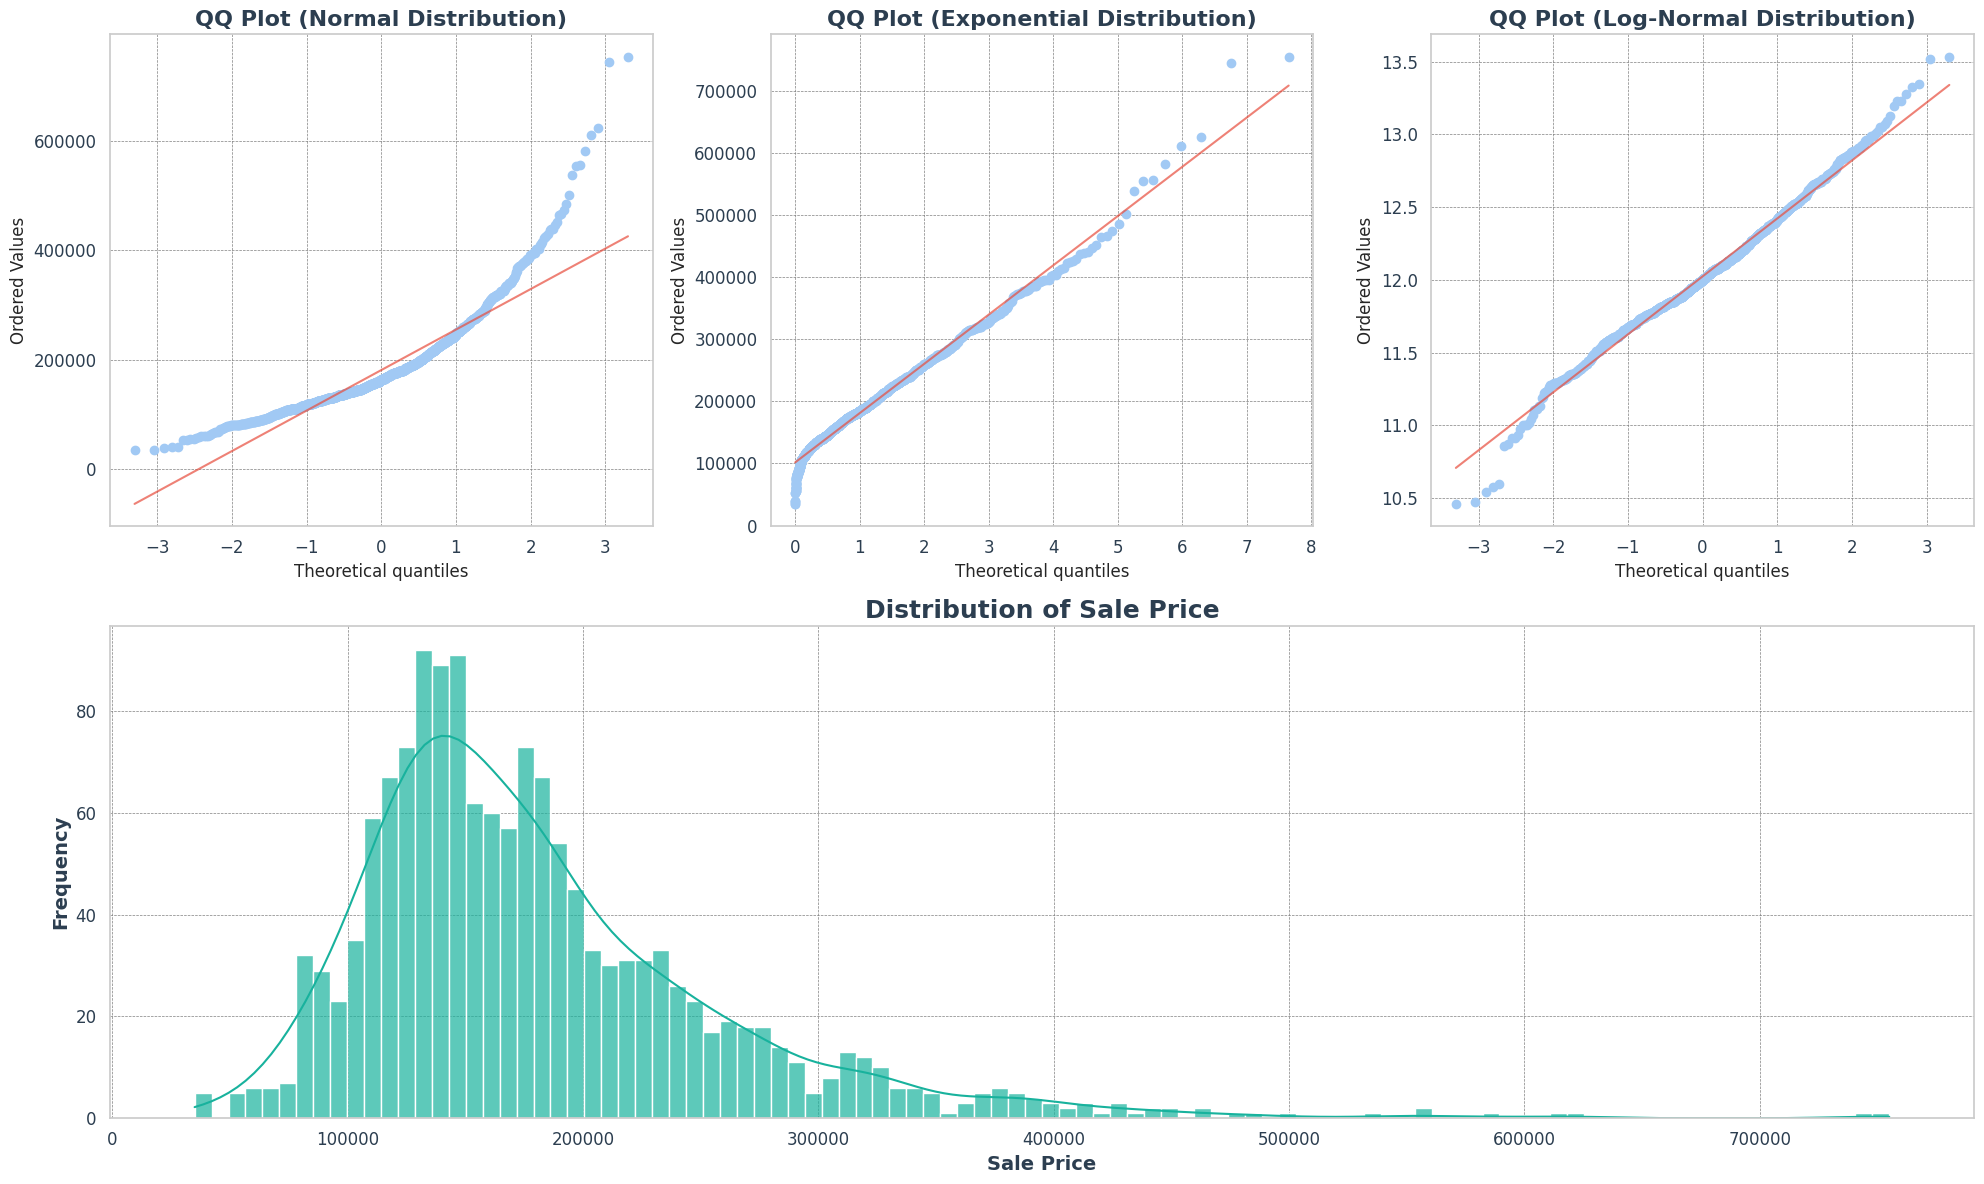

In [ ]:
import scipy.stats as stats

sns.set(style="whitegrid", palette="pastel")

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3)

ax0 = fig.add_subplot(gs[1, :])
sns.histplot(y, bins=100, kde=True, color="#18b29d", ax=ax0, alpha=0.7)
ax0.set_title('Distribution of Sale Price', fontsize=18, fontweight='bold', color="#2c3e50")
ax0.set_xlabel('Sale Price', fontsize=14, fontweight='bold', color="#2c3e50")
ax0.set_ylabel('Frequency', fontsize=14, fontweight='bold', color="#2c3e50")
ax0.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax0.tick_params(axis='x', labelsize=12, colors="#2c3e50")
ax0.tick_params(axis='y', labelsize=12, colors="#2c3e50")

ax1 = fig.add_subplot(gs[0, 0])
stats.probplot(y, dist="norm", plot=ax1)
ax1.get_lines()[1].set_color("#e74c3c")
ax1.get_lines()[1].set_alpha(0.7)
ax1.set_title('QQ Plot (Normal Distribution)', fontsize=16, fontweight='bold', color="#2c3e50")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax1.tick_params(axis='x', labelsize=12, colors="#2c3e50")
ax1.tick_params(axis='y', labelsize=12, colors="#2c3e50")

ax2 = fig.add_subplot(gs[0, 1])
stats.probplot(y, dist="expon", plot=ax2)
ax2.get_lines()[1].set_color("#e74c3c")
ax2.get_lines()[1].set_alpha(0.7)
ax2.set_title('QQ Plot (Exponential Distribution)', fontsize=16, fontweight='bold', color="#2c3e50")
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax2.tick_params(axis='x', labelsize=12, colors="#2c3e50")
ax2.tick_params(axis='y', labelsize=12, colors="#2c3e50")

ax3 = fig.add_subplot(gs[0, 2])
stats.probplot(np.log(y), dist="norm", plot=ax3)
ax3.get_lines()[1].set_color("#e74c3c")
ax3.get_lines()[1].set_alpha(0.7)
ax3.set_title('QQ Plot (Log-Normal Distribution)', fontsize=16, fontweight='bold', color="#2c3e50")
ax3.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax3.tick_params(axis='x', labelsize=12, colors="#2c3e50")
ax3.tick_params(axis='y', labelsize=12, colors="#2c3e50")

plt.tight_layout()
plt.show()

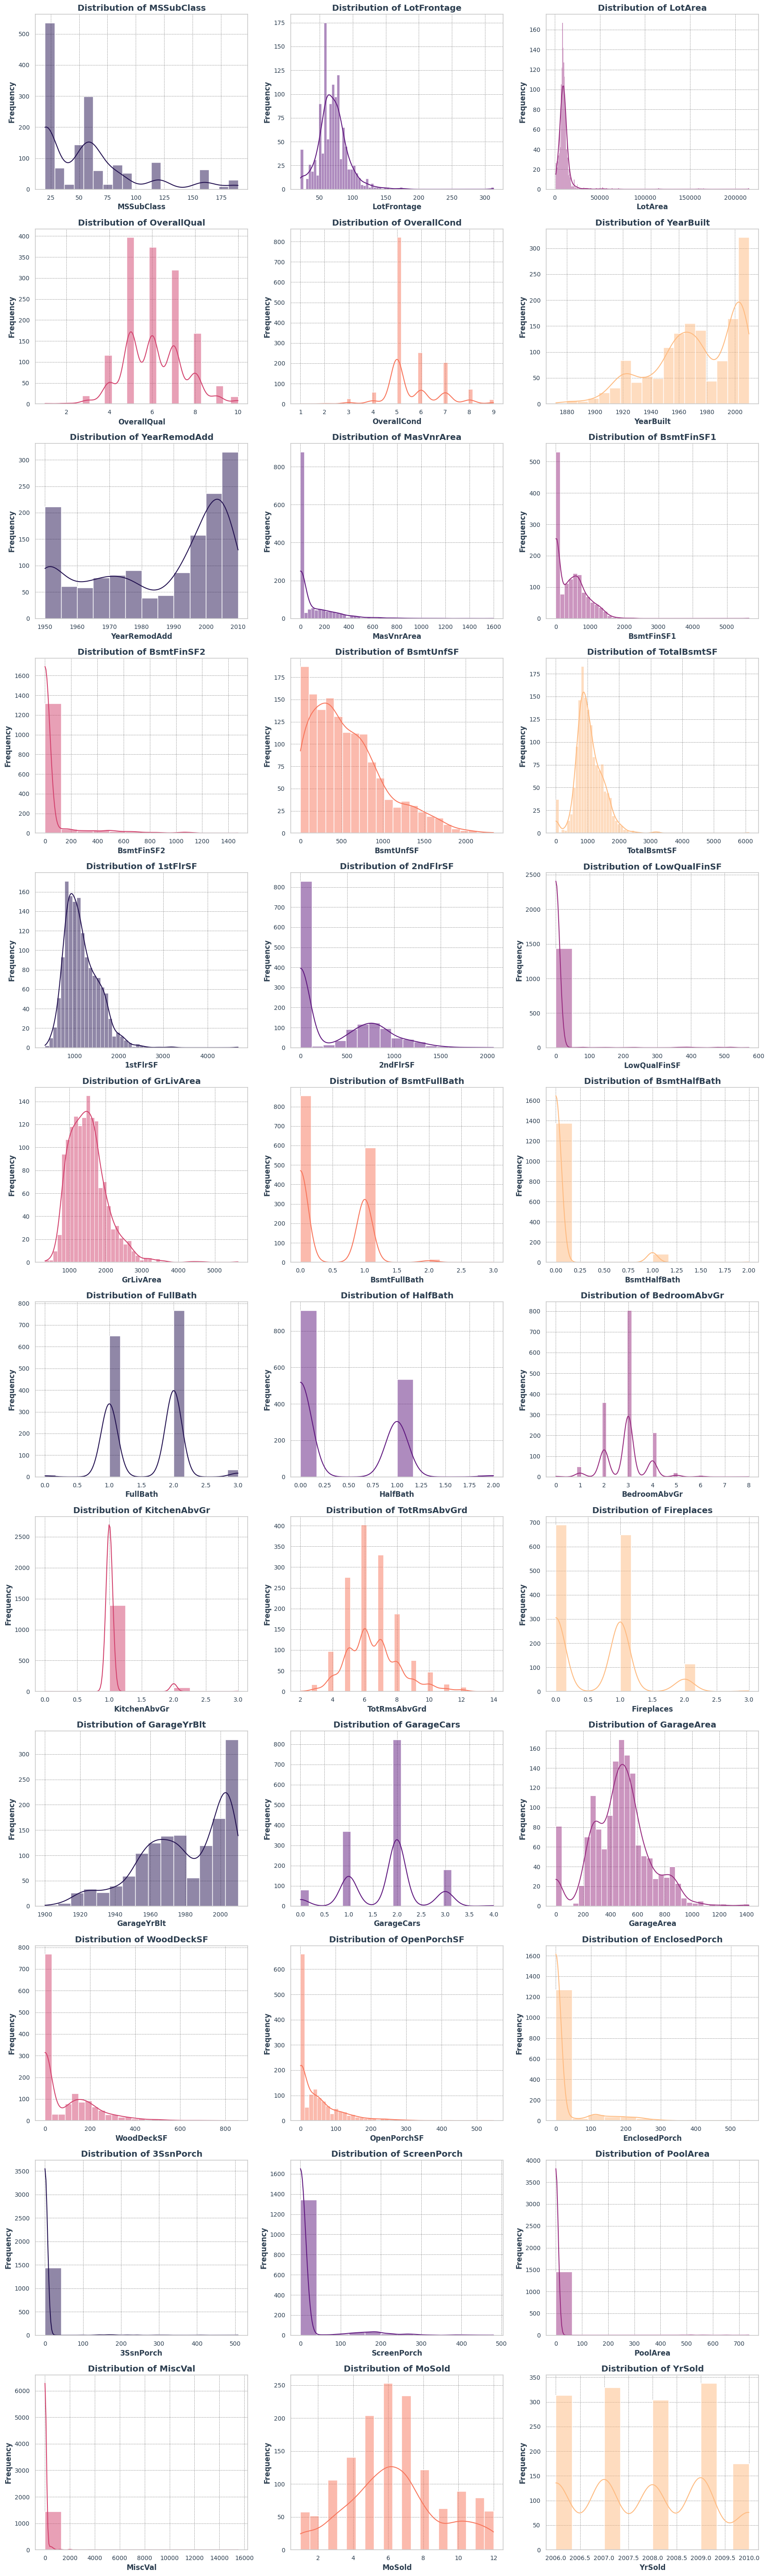

In [ ]:
sns.set(style="whitegrid", palette="magma")

df_num_filtered = X.select_dtypes(include=["int64", "float64"])

num_cols = 3
num_features = len(df_num_filtered.columns)
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(df_num_filtered.columns):
    sns.histplot(df_num_filtered[col], kde=True, color=sns.color_palette()[i % len(sns.color_palette())], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold', color="#2c3e50")
    axes[i].set_xlabel(col, fontsize=12, fontweight='bold', color="#2c3e50")
    axes[i].set_ylabel('Frequency', fontsize=12, fontweight='bold', color="#2c3e50")
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    axes[i].tick_params(axis='x', labelsize=10, colors="#2c3e50")
    axes[i].tick_params(axis='y', labelsize=10, colors="#2c3e50")
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## MI Scores

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    X=X.fillna(0)
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
mi_scores=make_mi_scores(X,y)

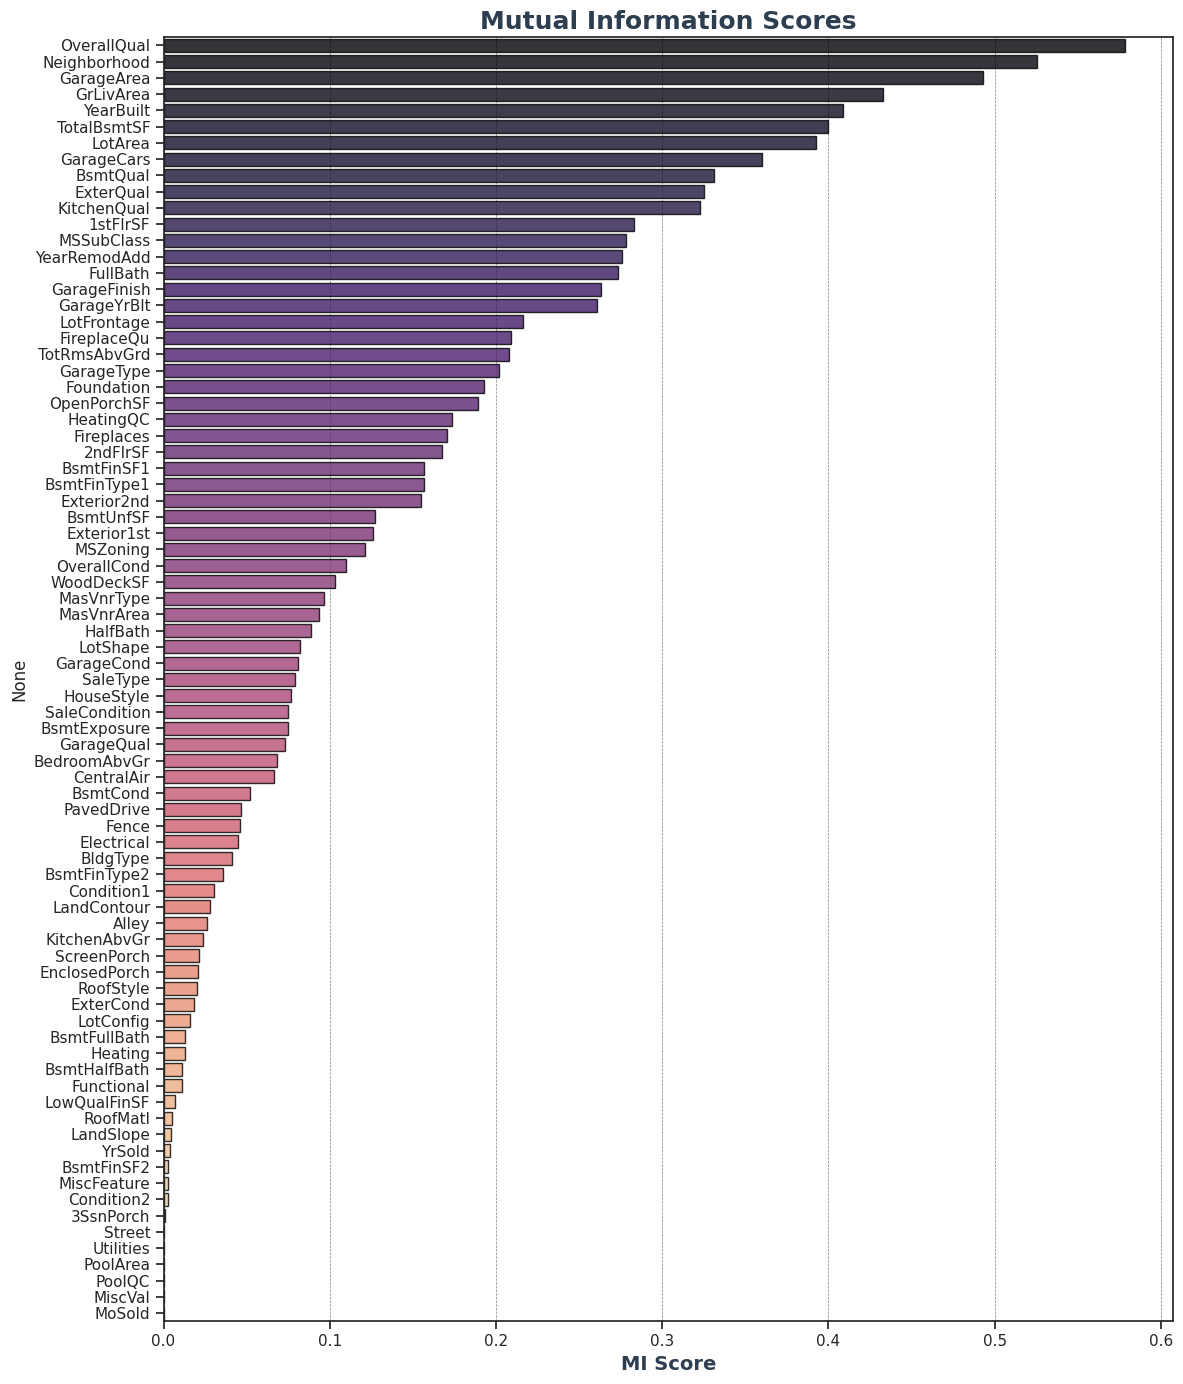

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=False)
    sns.set(style="ticks", palette="magma")
    plt.figure(figsize=(12, 14))
    sns.barplot(x=scores.values, y=scores.index, palette="magma", edgecolor="black", alpha=0.8)
    plt.title("Mutual Information Scores", fontsize=18, fontweight='bold', color="#2c3e50")
    plt.xlabel("MI Score", fontsize=14, fontweight='bold', color="#2c3e50")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', axis='x')
    plt.tight_layout()
    plt.show()

plot_mi_scores(mi_scores)

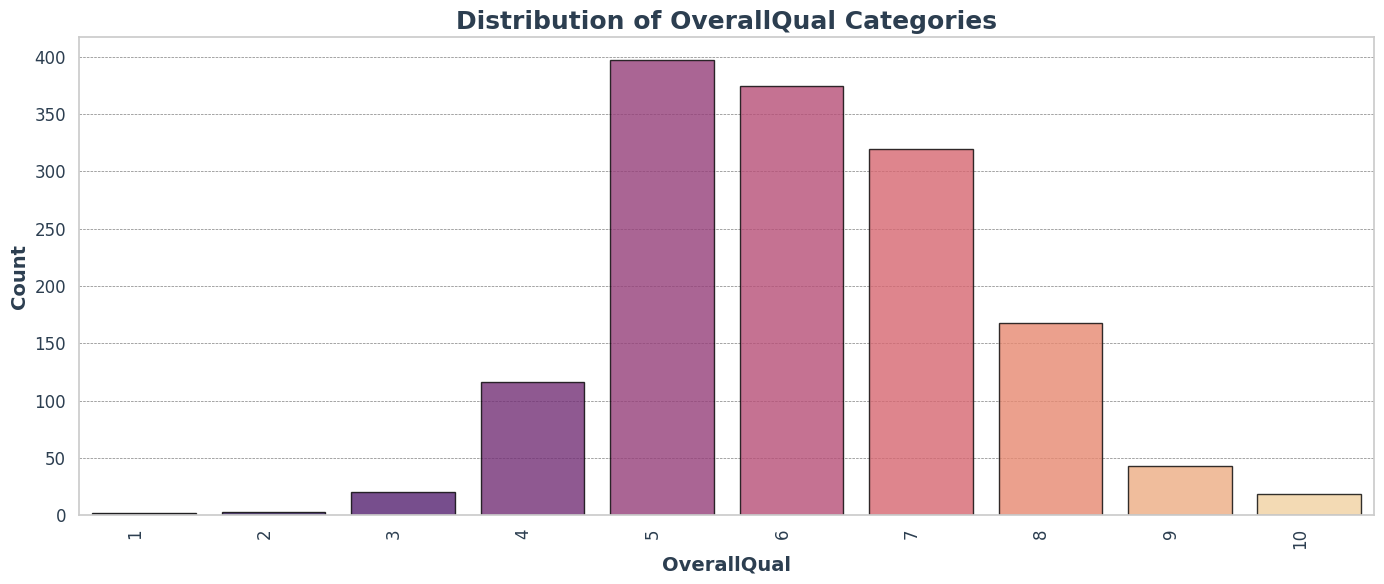

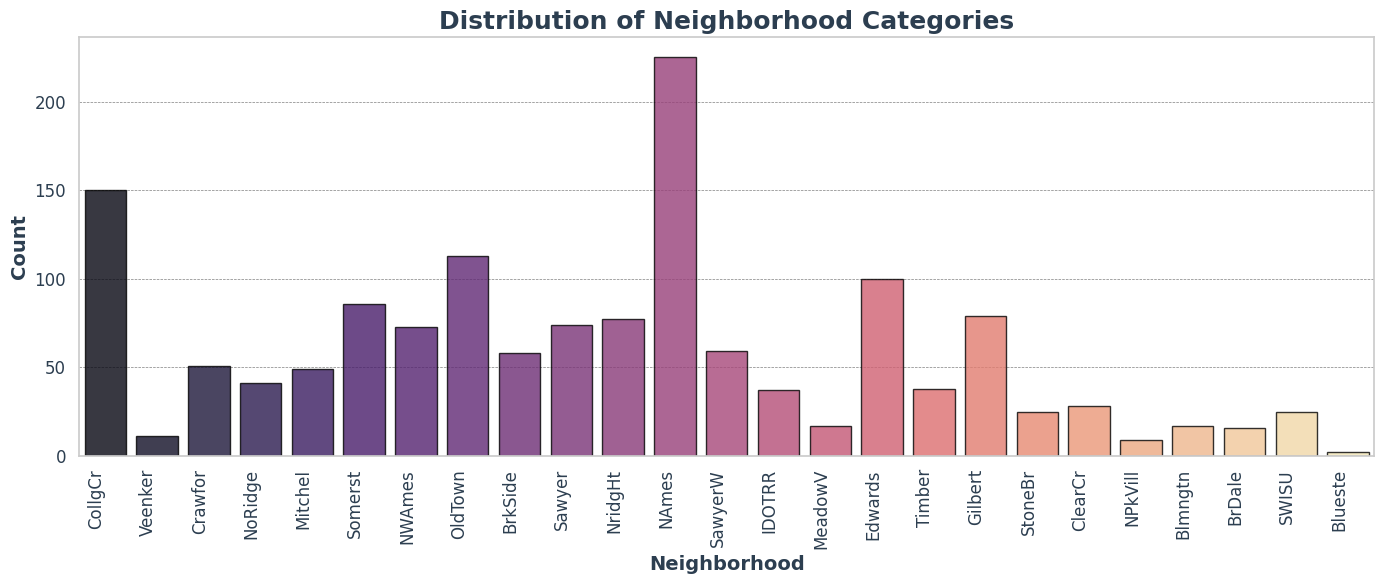

In [ ]:
def plot_categorical_columns(data, columns_to_plot):
    sns.set(style="whitegrid", palette="pastel")
    plt.rcParams['figure.figsize'] = (14, 6)

    for column in columns_to_plot:
        plt.figure()
        sns.countplot(x=column, data=data, palette="magma", edgecolor="black", alpha=0.8)

        plt.title(f'Distribution of {column} Categories', fontsize=18, fontweight='bold', color="#2c3e50")
        plt.xlabel(column, fontsize=14, fontweight='bold', color="#2c3e50")
        plt.ylabel('Count', fontsize=14, fontweight='bold', color="#2c3e50")

        plt.xticks(rotation=90, fontsize=12, color="#2c3e50", ha='right')
        plt.yticks(fontsize=12, color="#2c3e50")

        plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', axis='y')
        plt.tight_layout()
        plt.show()

columns_to_plot = ['OverallQual', 'Neighborhood']
plot_categorical_columns(X, columns_to_plot)
sns.reset_orig()

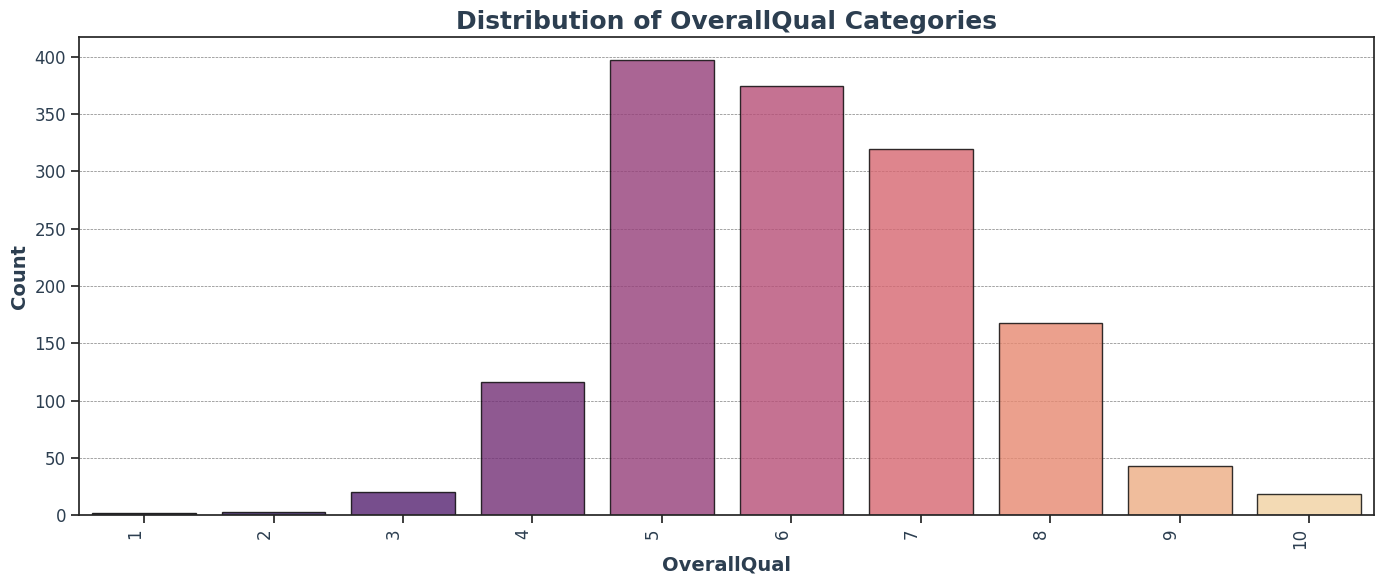

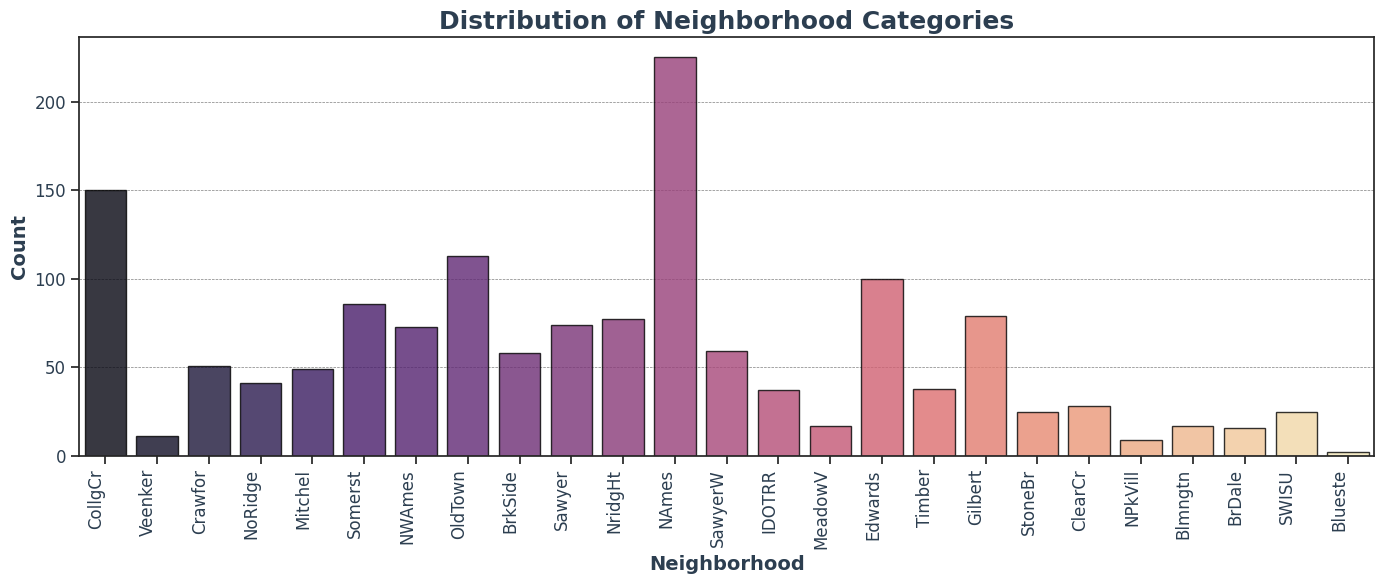

In [ ]:
def plot_categorical_columns(data, columns_to_plot):
    sns.set(style="ticks", palette="pastel")
    plt.rcParams['figure.figsize'] = (14, 6)

    for column in columns_to_plot:
        plt.figure()
        sns.countplot(x=column, data=data, palette="magma", edgecolor="black", alpha=0.8)

        plt.title(f'Distribution of {column} Categories', fontsize=18, fontweight='bold', color="#2c3e50")
        plt.xlabel(column, fontsize=14, fontweight='bold', color="#2c3e50")
        plt.ylabel('Count', fontsize=14, fontweight='bold', color="#2c3e50")

        plt.xticks(rotation=90, fontsize=12, color="#2c3e50", ha='right')
        plt.yticks(fontsize=12, color="#2c3e50")

        plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', axis='y')
        plt.tight_layout()
        plt.show()

columns_to_plot = ['OverallQual', 'Neighborhood']
plot_categorical_columns(X, columns_to_plot)

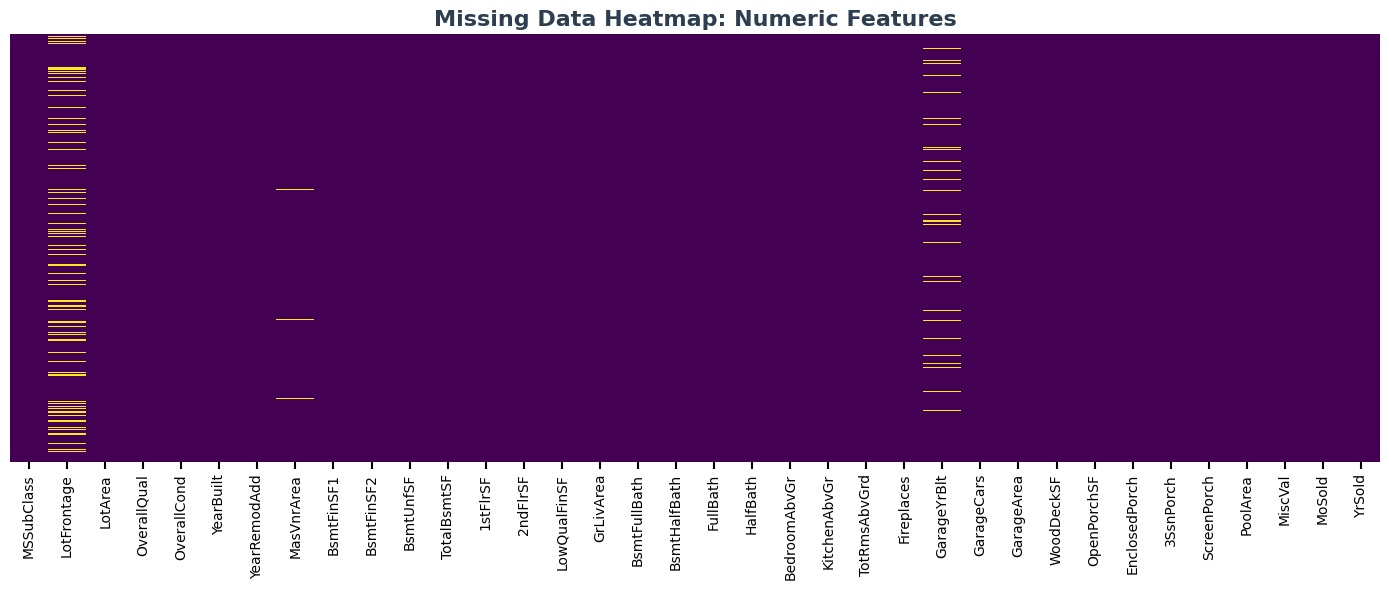

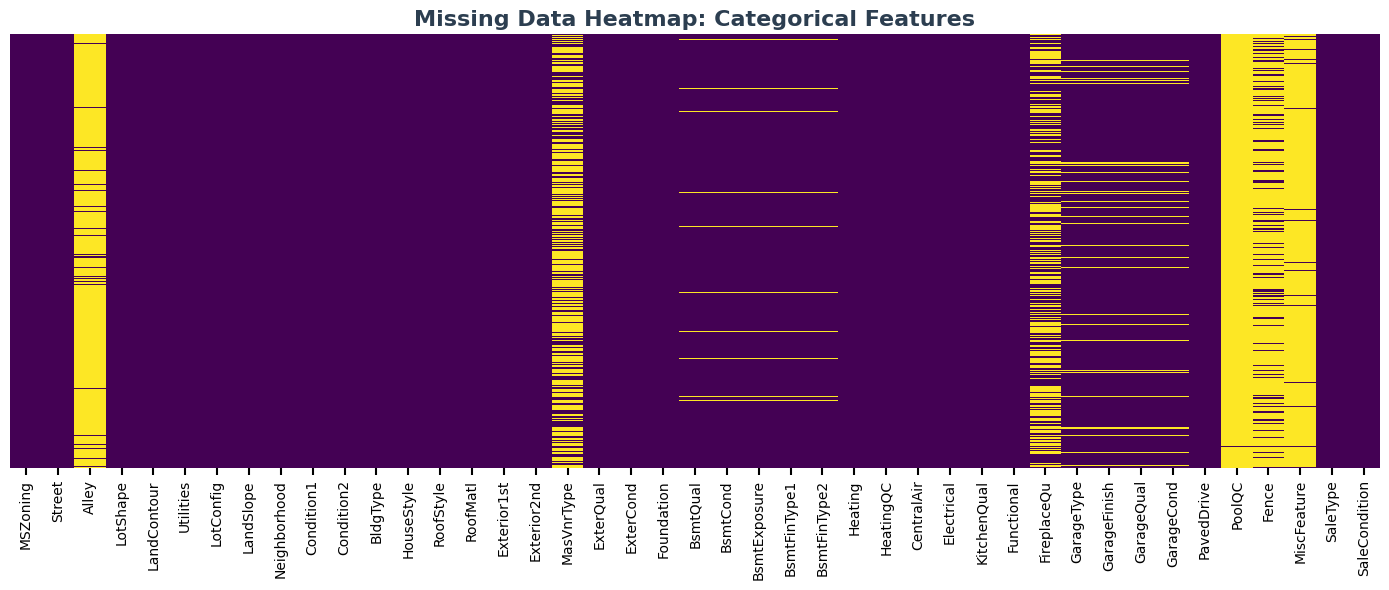

In [ ]:
def plot_missing_data_heatmaps(X):
    X_num = X.select_dtypes(include=["int64","float64"])
    X_obj = X.drop(columns=X_num)

    heatmap_dfs = [X_num, X_obj]
    titles = ["Numeric Features", "Categorical Features"]
    sns.reset_orig()

    for df, title in zip(heatmap_dfs, titles):
        plt.figure(figsize=(14, 6))
        ax = sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
        plt.xticks(rotation=90)
        ax.xaxis.set_tick_params(which='both', length=5, width=1.5, color='black')

        plt.title(f'Missing Data Heatmap: {title}', fontsize=16, fontweight='bold', color="#2c3e50")
        plt.tight_layout()
        plt.show()

plot_missing_data_heatmaps(X)

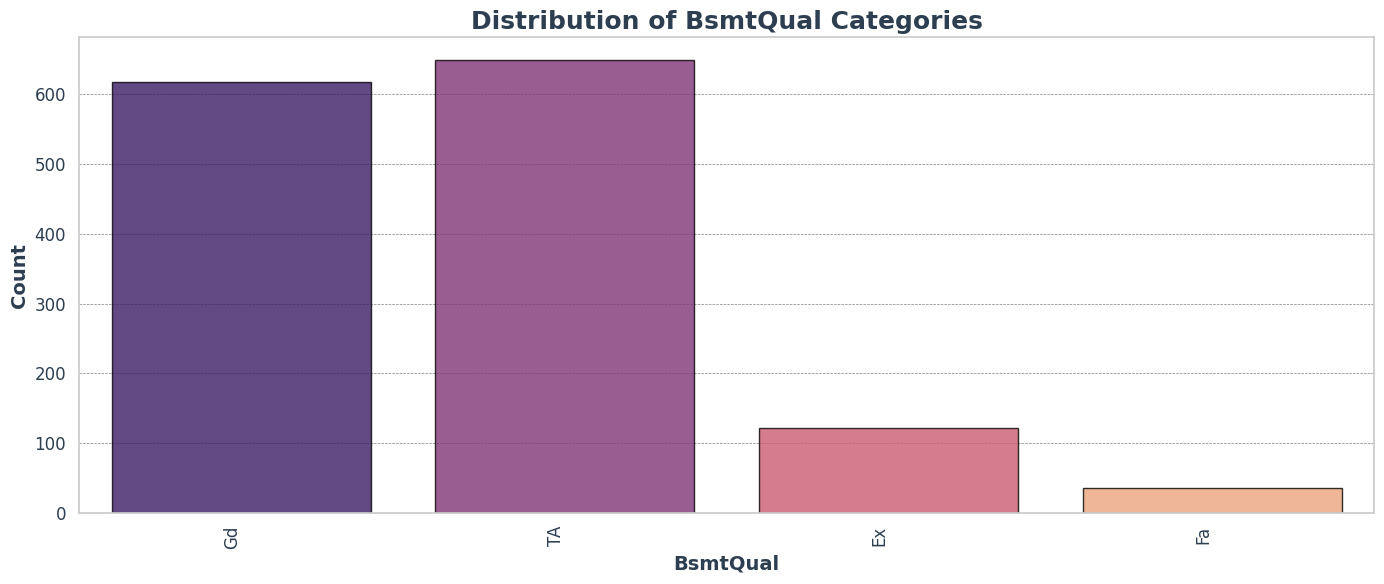

In [ ]:
columns_to_plot = ['BsmtQual']
plot_categorical_columns(X, columns_to_plot)

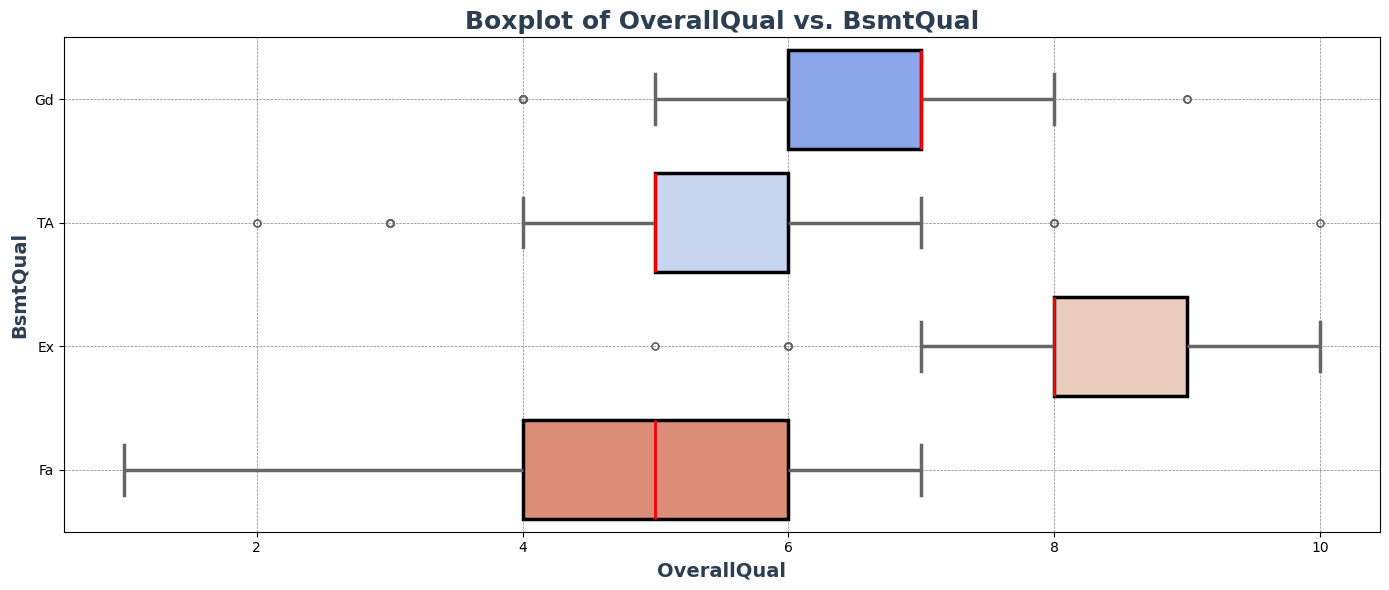

In [ ]:
def plot_boxplot(X, x, y):
    plt.figure(figsize=(14, 6))

    sns.boxplot(x=x, y=y, data=X, palette="coolwarm",
                linewidth=2.5, fliersize=5, boxprops=dict(edgecolor="black"),
                medianprops=dict(color="red", linewidth=2))
    plt.title(f'Boxplot of {x} vs. {y}', fontsize=18, fontweight='bold', color="#2c3e50")
    plt.xlabel(x, fontsize=14, fontweight='bold', color="#2c3e50")
    plt.ylabel(y, fontsize=14, fontweight='bold', color="#2c3e50")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    plt.tight_layout()
    plt.show()

plot_boxplot(X, "OverallQual", "BsmtQual")

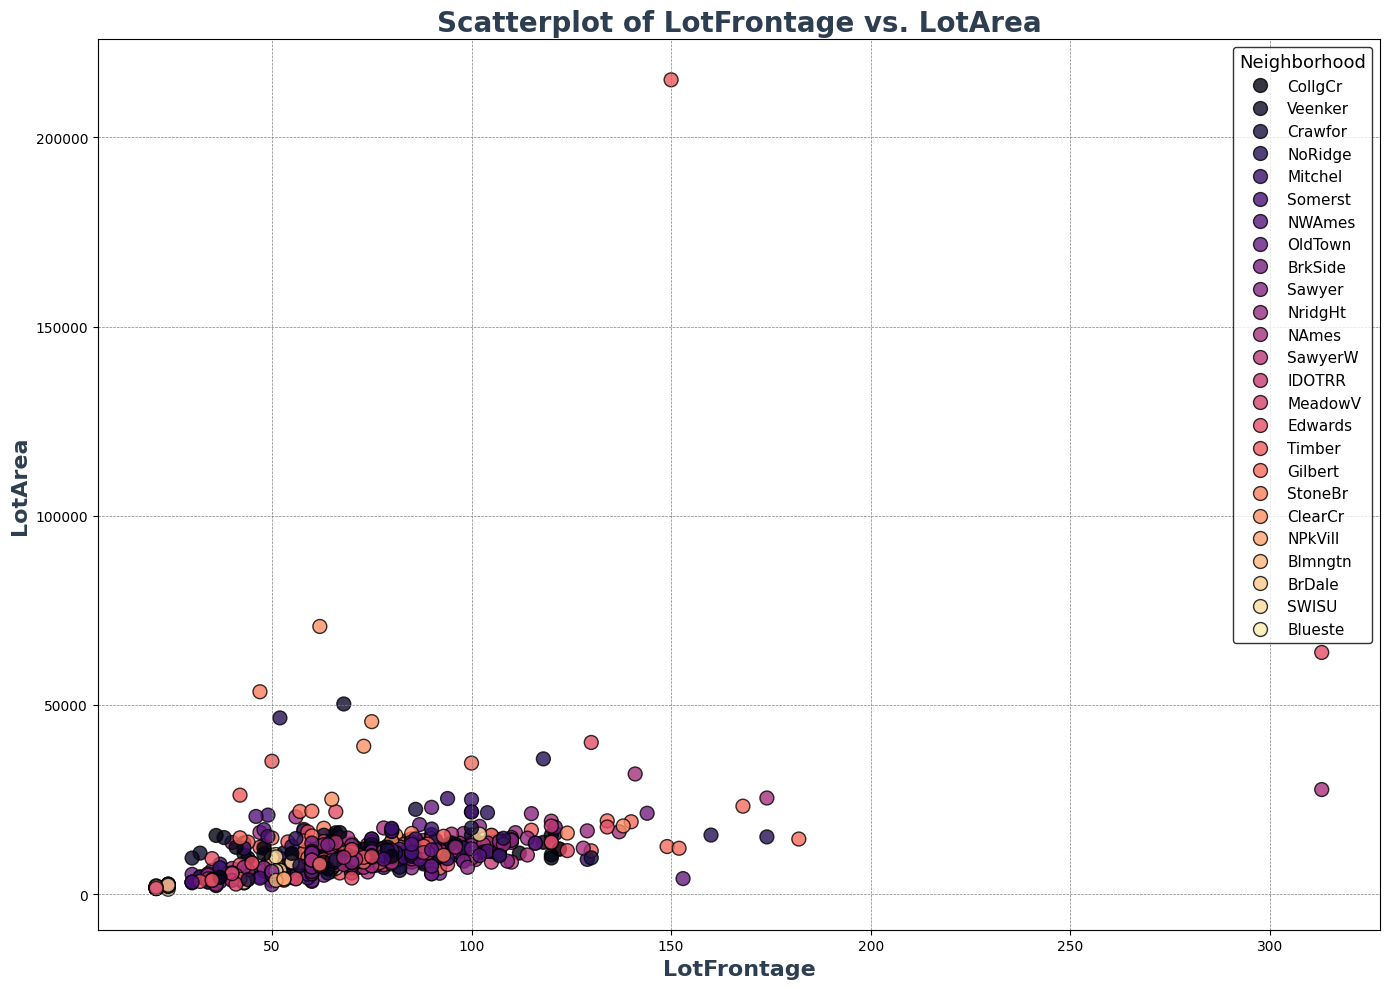

In [ ]:
def plot_scatterplot(X, x, y, z):
    plt.figure(figsize=(14, 10))
    sns.scatterplot(x=x, y=y, hue=z, data=X,
                    palette="magma", s=100, alpha=0.8, edgecolor="black", linewidth=1)

    plt.title(f'Scatterplot of {x} vs. {y}', fontsize=20, fontweight='bold', color="#2c3e50")
    plt.xlabel(x, fontsize=16, fontweight='bold', color="#2c3e50")
    plt.ylabel(y, fontsize=16, fontweight='bold', color="#2c3e50")

    plt.legend(title=z, title_fontsize='13', fontsize='11', loc='best', frameon=True, facecolor='white', edgecolor='black')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    plt.tight_layout()
    plt.show()

plot_scatterplot(X, "LotFrontage", "LotArea", "Neighborhood")

### Chi-square value & P-value

In [ ]:
from scipy.stats import chi2_contingency

frequency_table = pd.crosstab(X['Neighborhood'], X['MasVnrType'])
chi2, p, _, _ = chi2_contingency(frequency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 218.60141108726592
P-value: 5.315779877965319e-25


### Bar Chart

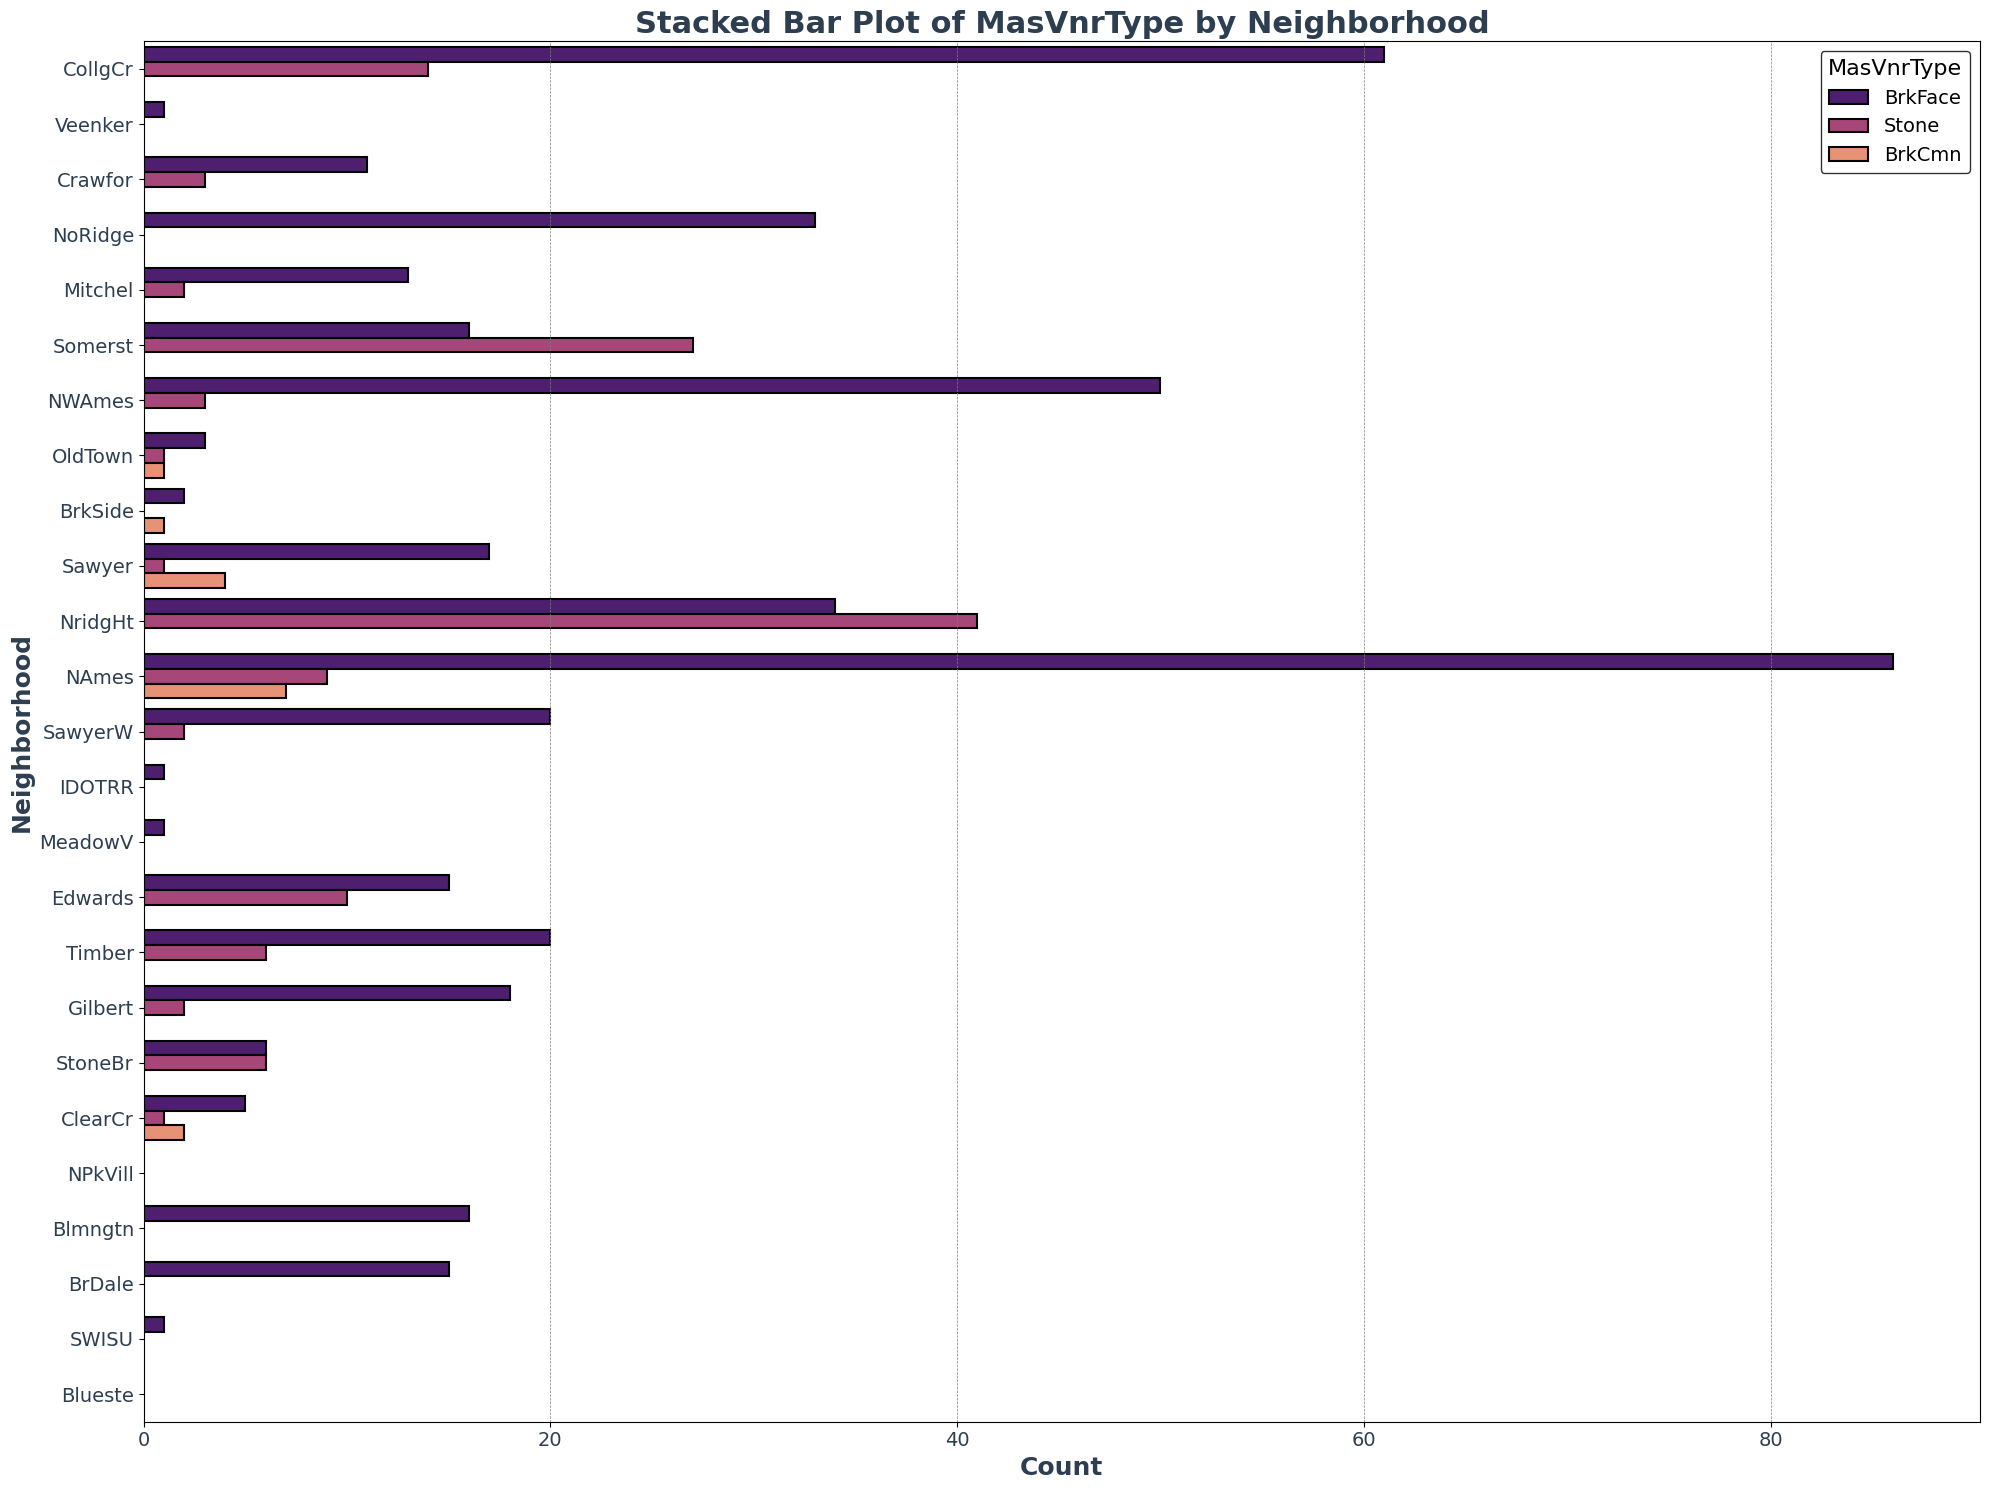

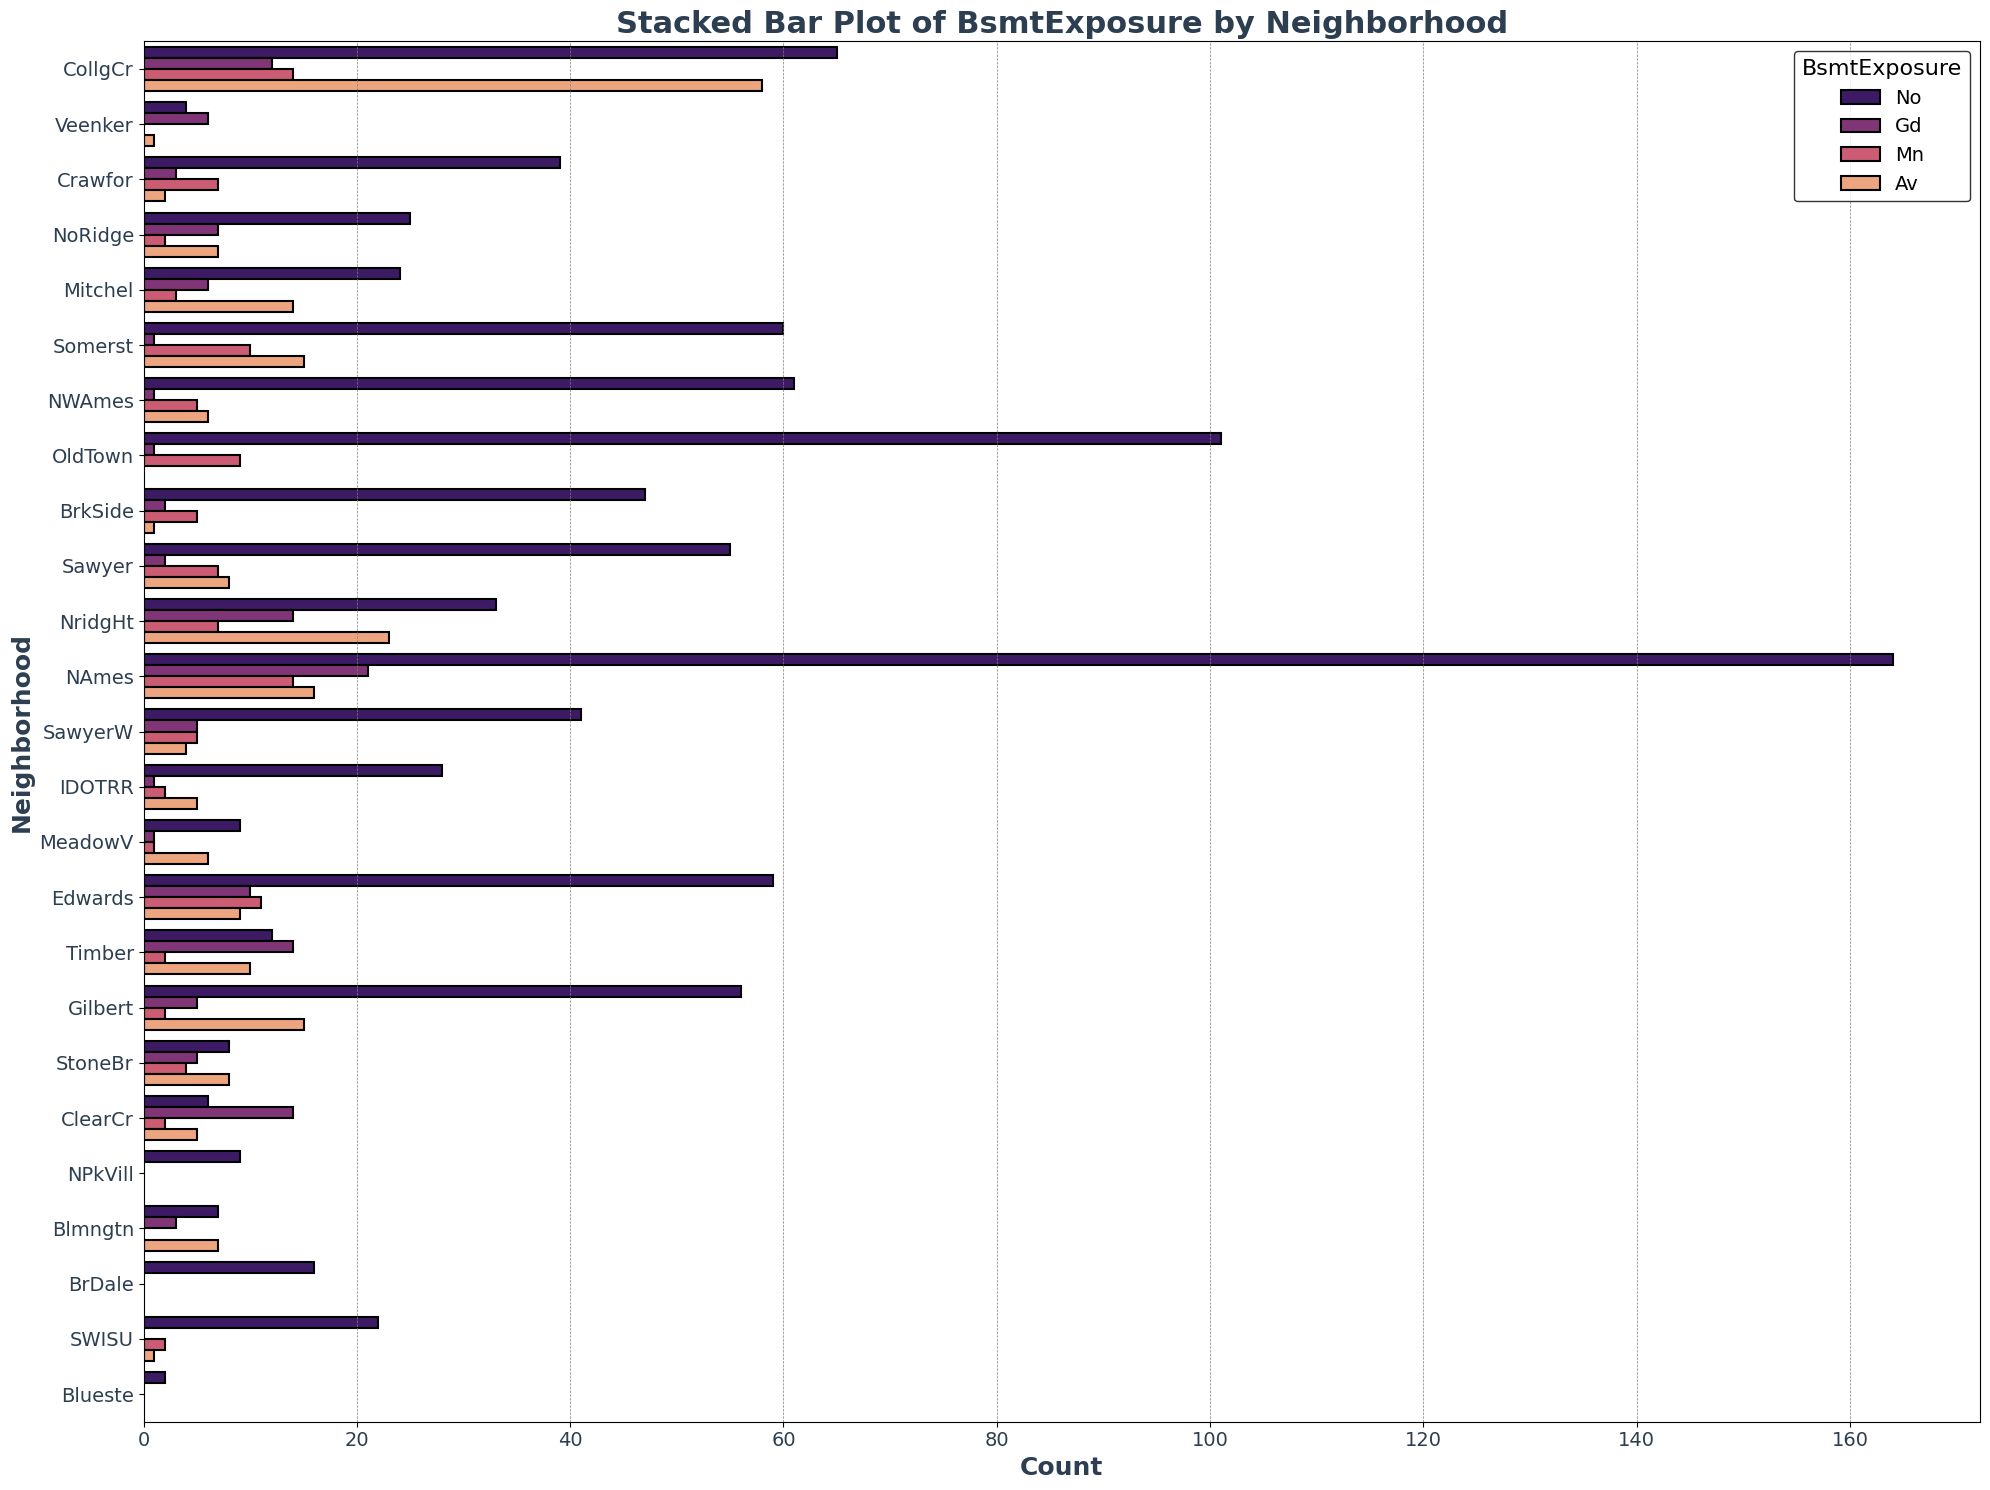

In [ ]:
def plot_barplot(y, hue, X):
    plt.figure(figsize=(20, 15))
    sns.countplot(y=y, hue=hue, data=X, palette="magma", edgecolor="black", linewidth=1.5)

    plt.title(f'Stacked Bar Plot of {hue} by {y}', fontsize=22, fontweight='bold', color="#2c3e50")
    plt.xlabel('Count', fontsize=18, fontweight='bold', color="#2c3e50")
    plt.ylabel(y, fontsize=18, fontweight='bold', color="#2c3e50")

    plt.yticks(rotation=0, fontsize=14, color="#2c3e50")
    plt.xticks(fontsize=14, color="#2c3e50")

    plt.legend(title=hue, title_fontsize='16', fontsize='14', loc='best', frameon=True, facecolor='white', edgecolor='black')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', axis='x')
    plt.tight_layout()
    plt.show()

hue = ['MasVnrType','BsmtExposure']
for hue in hue:
    plot_barplot('Neighborhood', hue, X)

## Heatmap of MasVnrType vs. Neighborhood

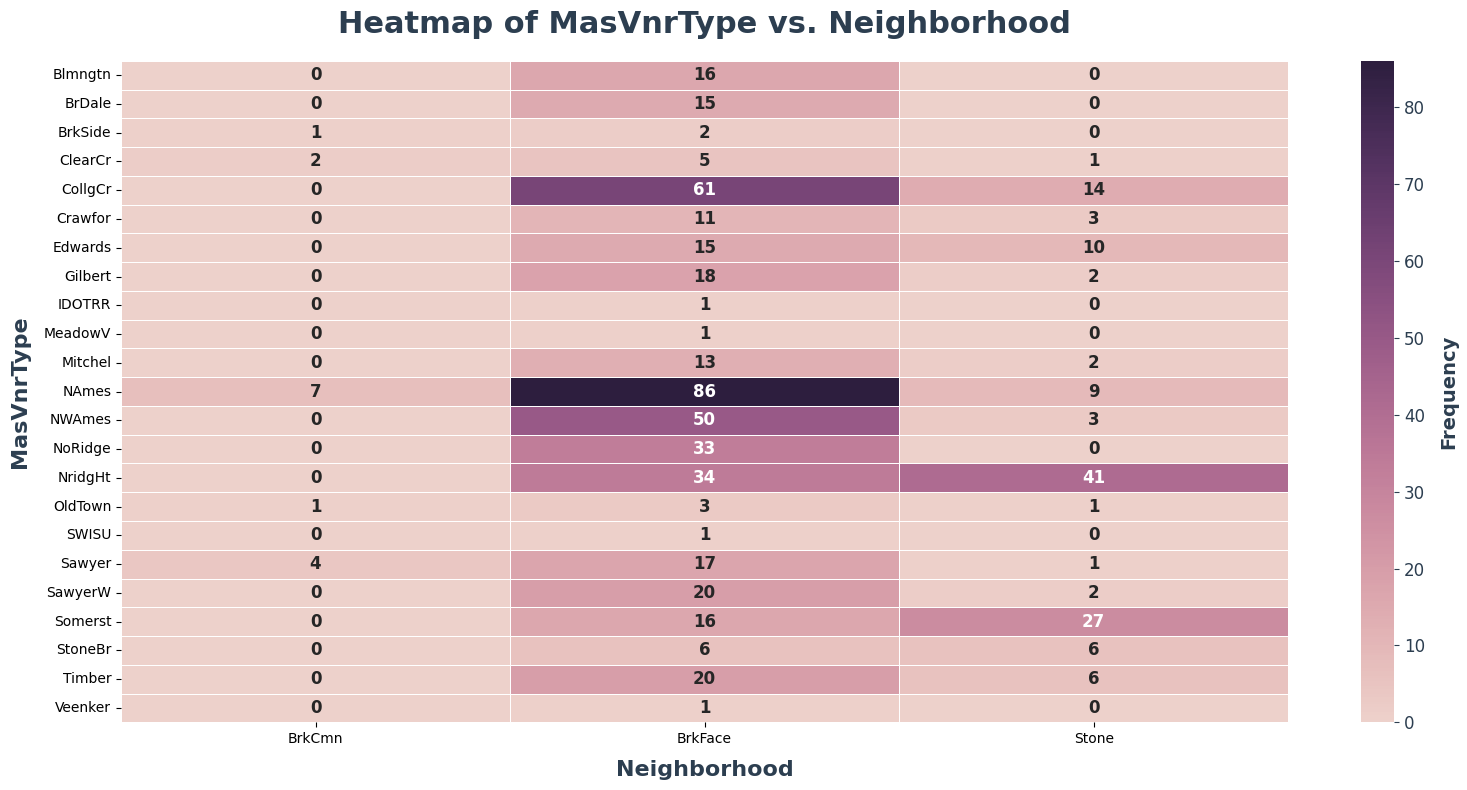

In [ ]:
def plot_heatmap(frequency_table, title):
    plt.figure(figsize=(16, 8))
    heatmap = sns.heatmap(frequency_table, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='g',
                          cbar=True, linewidths=0.5, linecolor='white',
                          annot_kws={"size": 12, "weight": "bold"})

    plt.title(title, fontsize=22, fontweight='bold', color="#2c3e50", pad=20)
    plt.xlabel('Neighborhood', fontsize=16, fontweight='bold', color="#2c3e50", labelpad=10)
    plt.ylabel('MasVnrType', fontsize=16, fontweight='bold', color="#2c3e50", labelpad=10)

    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12, colors="#2c3e50")
    cbar.set_label('Frequency', fontsize=14, fontweight='bold', color="#2c3e50", labelpad=10)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_heatmap(frequency_table=frequency_table, title='Heatmap of MasVnrType vs. Neighborhood')
sns.reset_orig()

### Correlation between LotArea and LotFrontage

In [ ]:
correlation_coefficient=X["LotArea"].corr(X["LotFrontage"])
correlation_coefficient

0.42609501877180833

In [ ]:
correlation_coefficient=X["OverallQual"].corr(X["OverallCond"])
correlation_coefficient

-0.0919323426390718

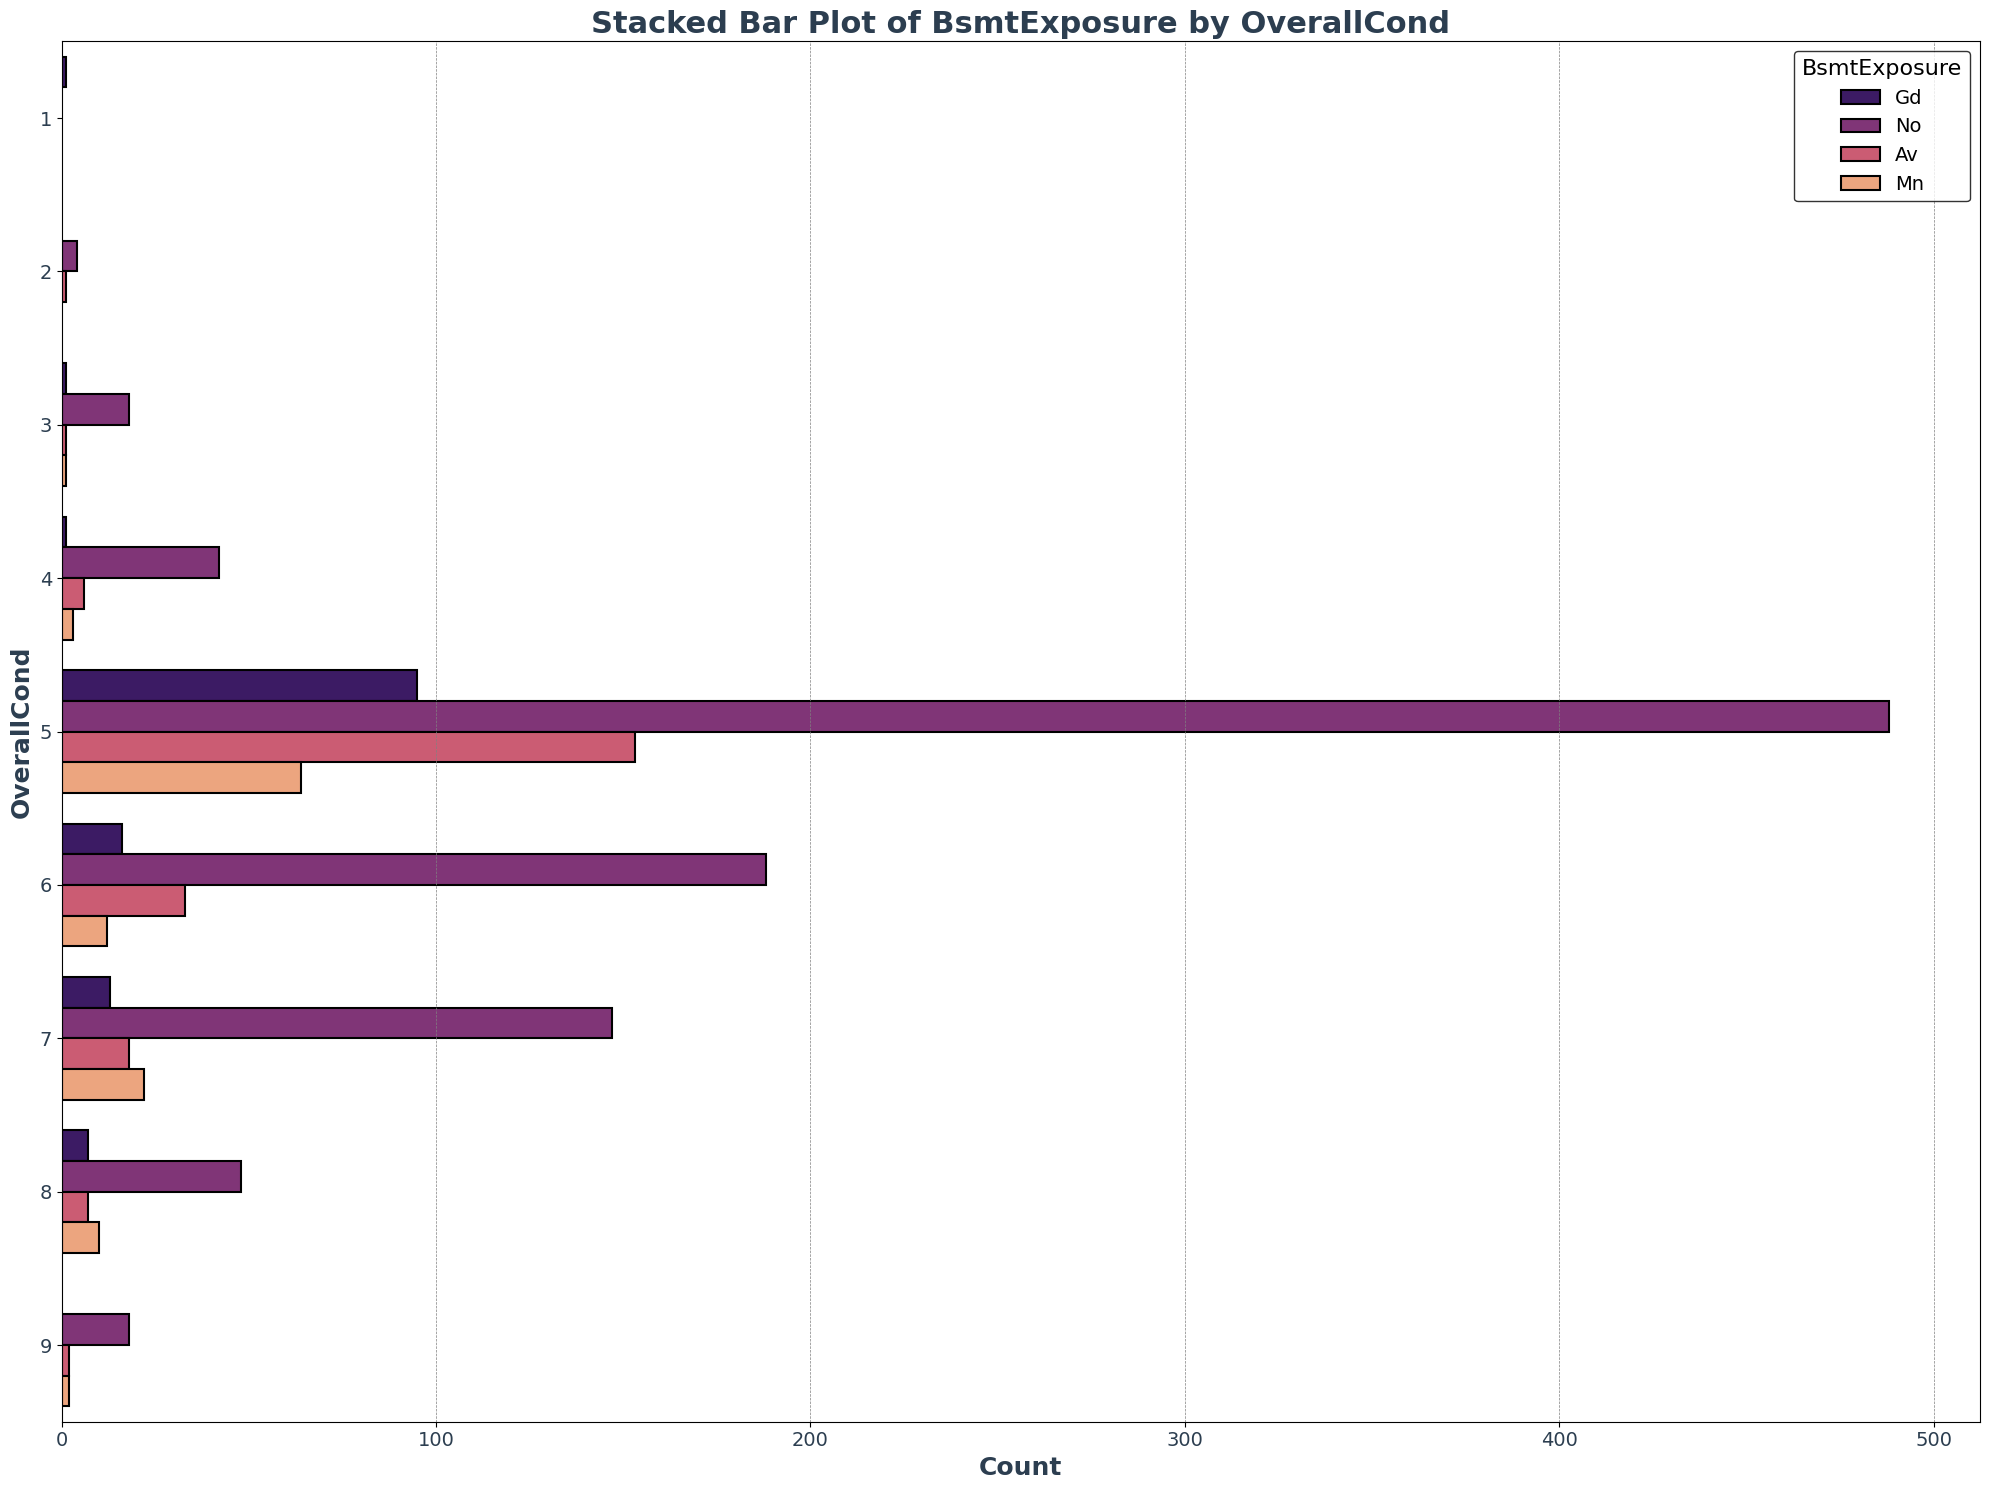

In [ ]:
plot_barplot('OverallCond','BsmtExposure',X)

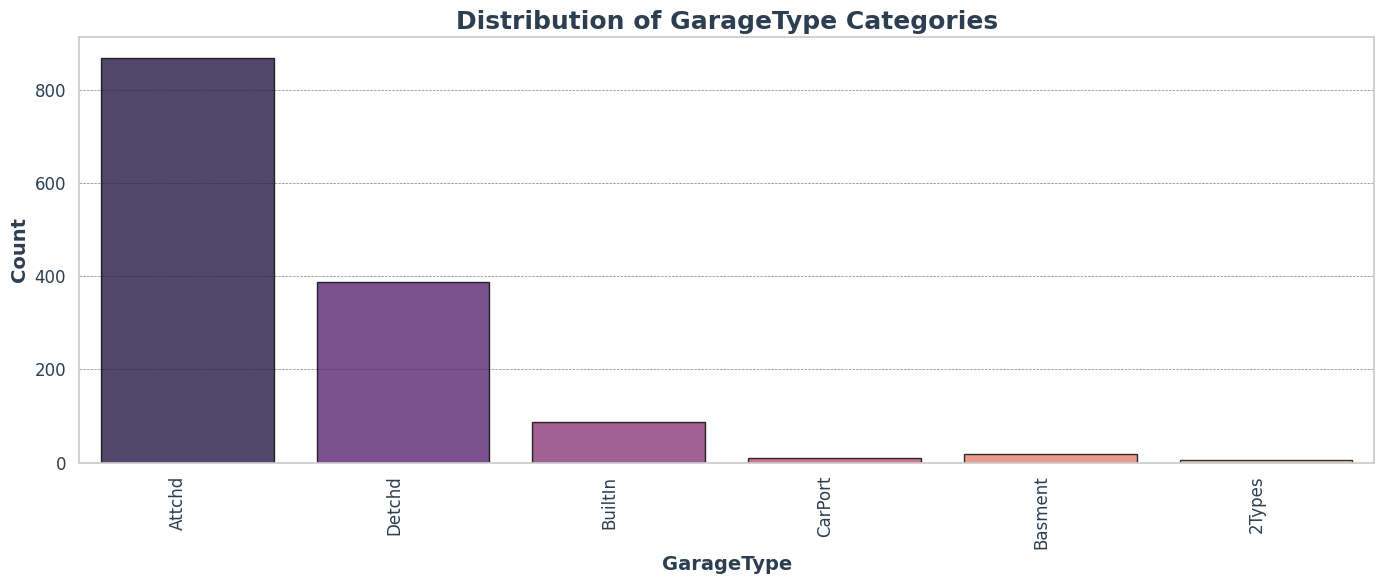

In [ ]:
plot_categorical_columns(X, ['GarageType'])

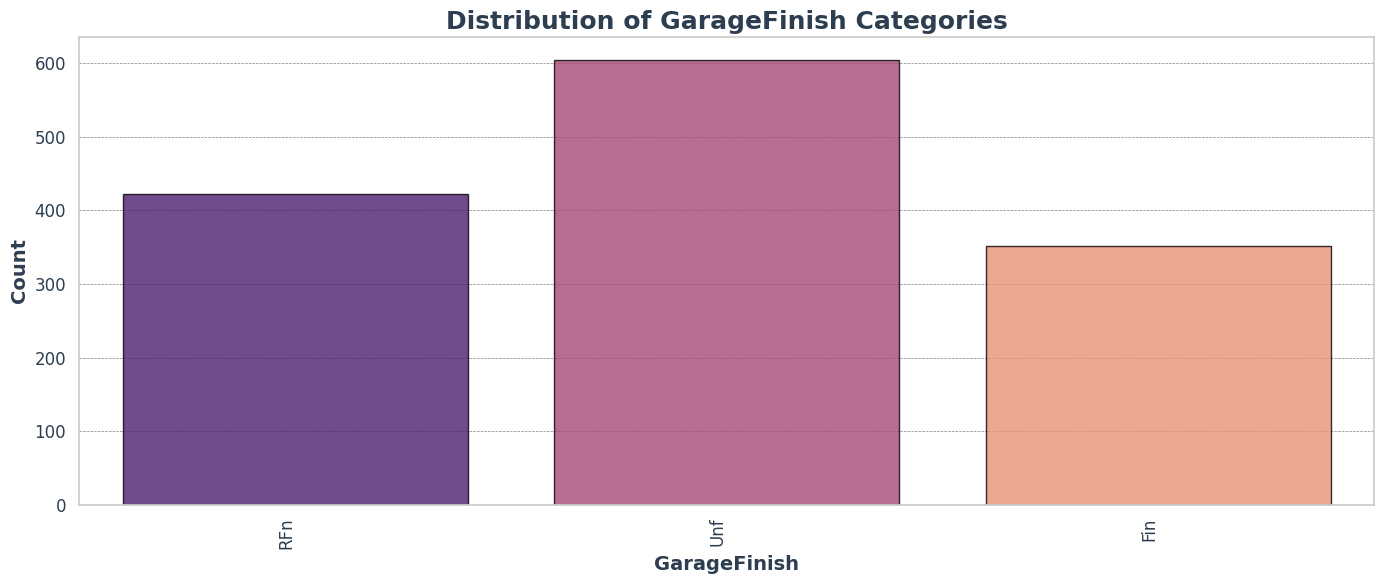

In [ ]:
plot_categorical_columns(X, ['GarageFinish'])

# Data Preprocessing

In [ ]:
features_drop = ['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature']
X.drop(features_drop,axis=1,inplace=True)

In [ ]:
X_num = X.select_dtypes(include=["int64","float64"])
X_obj = X.drop(columns=X_num)

In [ ]:
X_num.apply(lambda x: x.nunique()).to_frame()

0
MSSubClass       15
LotFrontage     110
LotArea        1073
OverallQual      10
OverallCond       9
YearBuilt       112
YearRemodAdd     61
MasVnrArea      327
BsmtFinSF1      637
BsmtFinSF2      144
BsmtUnfSF       780
TotalBsmtSF     721
1stFlrSF        753
2ndFlrSF        417
LowQualFinSF     24
GrLivArea       861
BsmtFullBath      4
BsmtHalfBath      3
FullBath          4
HalfBath          3
BedroomAbvGr      8
KitchenAbvGr      4
TotRmsAbvGrd     12
Fireplaces        4
GarageYrBlt      97
GarageCars        5
GarageArea      441
WoodDeckSF      274
OpenPorchSF     202
EnclosedPorch   120
3SsnPorch        20
ScreenPorch      76
PoolArea          8
MiscVal          21
MoSold           12
YrSold            5

## Numerical Features

In [ ]:
Neighborhood_Lot=X.groupby("Neighborhood")["LotFrontage"].mean()
X_num["LotFrontage"]=X["LotFrontage"].fillna(X["Neighborhood"].map(Neighborhood_Lot))

In [ ]:
X["GarageYrBlt"] = X["GarageYrBlt"].fillna(0)
X_num["GarageYrBlt"] = X["GarageYrBlt"]

In [ ]:
Neighborhood_MasVnrArea=X.groupby("Neighborhood")["MasVnrArea"].mean()
X["MasVnrArea"]=X["MasVnrArea"].fillna(X["Neighborhood"].map(Neighborhood_MasVnrArea))
X_num["MasVnrArea"] = X["MasVnrArea"]

In [ ]:
X_num = X_num.fillna(X_num.mean())

## Categorical Features

In [ ]:
X.loc[X["OverallQual"]>=8,"BsmtCond"]=X.loc[X["OverallQual"]>=8,"BsmtQual"].fillna("Ex")
X.loc[X["OverallQual"]>=6,"BsmtCond"]=X.loc[X["OverallQual"]>=6,"BsmtQual"].fillna("Gd")
X.loc[X["OverallQual"]>=5,"BsmtCond"]=X.loc[X["OverallQual"]>=5,"BsmtQual"].fillna("TA")
X.loc[X["OverallQual"]>=4,"BsmtCond"]=X.loc[X["OverallQual"]>=4,"BsmtQual"].fillna("Fa")
X.loc[X["OverallQual"]<=4,"BsmtCond"]=X.loc[X["OverallQual"]<=4,"BsmtQual"].fillna("Po")
X_obj["BsmtCond"] = X['BsmtCond']

In [ ]:
X.loc[X["OverallQual"]>=8,"BsmtQual"].fillna("Ex", inplace=True)
X.loc[(X["OverallQual"] >= 6) & (X["OverallQual"] < 8), "BsmtQual"].fillna("Gd", inplace=True)
X.loc[(X["OverallQual"] >= 4) & (X["OverallQual"] < 6), "BsmtQual"].fillna("Fa", inplace=True)
X.loc[X["OverallQual"]<4,"BsmtQual"].fillna("Fa", inplace=True)
X_obj["BsmtQual"] =  X["BsmtQual"]

In [ ]:
X["BsmtExposure"].fillna("No", inplace=True)
X_obj['BsmtExposure'] = X['BsmtExposure']

In [ ]:
cond_fintype1=X.groupby("OverallCond")["BsmtFinType1"].transform(lambda x: x.mode().iloc[0])
X["BsmtFinType1"].fillna(cond_fintype1, inplace=True)
X_obj["BsmtFinType1"] = X["BsmtFinType1"]
cond_fintype2=X.groupby("OverallCond")["BsmtFinType2"].transform(lambda x: x.mode().iloc[0])
X["BsmtFinType2"].fillna(cond_fintype2, inplace=True)
X_obj["BsmtFinType2"] = X["BsmtFinType2"]

In [ ]:
X["Electrical"].fillna("SBrkr", inplace=True)
X_obj["Electrical"] = X["Electrical"]

In [ ]:
X["GarageType"].fillna("NG", inplace=True)
X_obj["GarageType"] = X["GarageType"]
X["GarageFinish"].fillna("NG", inplace=True)
X_obj["GarageFinish"] = X["GarageFinish"]
X["GarageQual"].fillna("NG", inplace=True)
X_obj["GarageQual"] = X["GarageQual"]
X["GarageCond"].fillna("NG", inplace=True)
X_obj["GarageCond"] = X["GarageCond"]

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ordered_cats = ["Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "SaleType", "SaleCondition"]
non_ordered_cats = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Heating", "CentralAir", "Electrical", "Functional", "PavedDrive"]
cols_to_encode = list(set(ordered_cats) | set(non_ordered_cats))
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False)
for cat in ordered_cats:
    X_obj[cat] = label_encoder.fit_transform(X_obj[cat])
one_hot_cats = one_hot_encoder.fit_transform(X_obj[non_ordered_cats])
X_obj_complete = pd.concat([X_obj.drop(non_ordered_cats, axis=1), pd.DataFrame(one_hot_cats, columns=one_hot_encoder.get_feature_names_out(non_ordered_cats))], axis=1)

In [ ]:
from scipy import stats

def remove_outliers_zscore(df, columns, threshold=4.0):
    initial_row_count = df.shape[0]
    z_scores = np.abs(stats.zscore(df[columns]))
    df = df[(z_scores < threshold).all(axis=1)]
    final_row_count = df.shape[0]
    rows_removed = initial_row_count - final_row_count
    print(f"Removed {rows_removed} rows due to outliers with Z-score threshold {threshold}.")
    return df

continuous_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                   '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                   'EnclosedPorch','ScreenPorch']

X_num_no_outliers = remove_outliers_zscore(X_num.copy(), continuous_cols)

X_obj_no_outliers = X_obj_complete.loc[X_num_no_outliers.index]
y_no_outliers = y.loc[X_num_no_outliers.index]

Removed 104 rows due to outliers with Z-score threshold 4.0.


In [ ]:
X_complete_no_outliers = pd.concat([X_num_no_outliers, X_obj_no_outliers], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_complete_no_outliers, y_no_outliers, test_size=0.2, random_state=666)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

# Model Training
## Stacked Ensemble
- Random Forest
- XGB Boost
- Light GBM
- CatBoost
- Linear Regression
- Artificial Neural Network

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_log_error

def rmsle(y_true, y_pred):
    y_true = np.clip(y_true, 0, None)
    y_pred = np.clip(y_pred, 0, None)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [ ]:
def rf_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    return cross_val_score(rf, X_train, y_train, cv=5, scoring=rmsle_scorer).mean()

rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=50)
best_rf_params = rf_study.best_params
rf = RandomForestRegressor(**best_rf_params)

[I 2024-09-03 23:48:50,669] A new study created in memory with name: no-name-2d51faf1-51f6-45a3-9f35-0cdf00cc5927
[I 2024-09-03 23:48:57,779] Trial 0 finished with value: -0.16605155453072704 and parameters: {'n_estimators': 282, 'max_depth': 29, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: -0.16605155453072704.
[I 2024-09-03 23:49:07,087] Trial 1 finished with value: -0.16629278445573553 and parameters: {'n_estimators': 476, 'max_depth': 29, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: -0.16605155453072704.
[I 2024-09-03 23:49:14,245] Trial 2 finished with value: -0.15044794294836075 and parameters: {'n_estimators': 258, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: -0.15044794294836075.
[I 2024-09-03 23:49:17,520] Trial 3 finished with value: -0.16633950356204208 and parameters: {'n_estimators': 199, 'max

In [ ]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_log_error(np.clip(y_true, 0, None), np.clip(y_pred, 0, None)))
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")
    print(f"R-squared (R²): {r2}")

    return {'MSE': mse, 'RMSE': rmse, 'RMSLE': rmsle, 'R²': r2}

In [167]:
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
evaluate_model(y_test, rf_y_pred)

Mean Squared Error (MSE): 570232399.7753389
Root Mean Squared Error (RMSE): 23879.539354337194
Root Mean Squared Logarithmic Error (RMSLE): 0.13478330812373934
R-squared (R²): 0.9076135488142791


{'MSE': 570232399.7753389,
 'RMSE': 23879.539354337194,
 'RMSLE': 0.13478330812373934,
 'R²': 0.9076135488142791}

In [222]:
best_rf_params

{'n_estimators': 426,
 'max_depth': 15,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None}

In [ ]:
def xgb_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 0.1, 10.0)
    reg_lambda = trial.suggest_loguniform('reg_lambda', 0.1, 10.0)
    min_child_weight = trial.suggest_float('min_child_weight', 1.0, 10.0)

    xgb = XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        min_child_weight=min_child_weight,
        random_state=42
    )
    return cross_val_score(xgb, X_train, y_train, cv=5, scoring=rmsle_scorer).mean()


xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(xgb_objective, n_trials=50)
best_xgb_params = xgb_study.best_params
xgb = XGBRegressor(**best_xgb_params)

[I 2024-09-03 23:17:24,029] A new study created in memory with name: no-name-d5923830-5934-4dd2-bdb1-19041c37d97f
[I 2024-09-03 23:17:32,162] Trial 0 finished with value: -0.13244176022037904 and parameters: {'n_estimators': 311, 'max_depth': 17, 'learning_rate': 0.24768421485499031, 'subsample': 0.8370886767477248, 'colsample_bytree': 0.7505488927007959, 'reg_alpha': 0.271246103418037, 'reg_lambda': 1.7910696304440377, 'min_child_weight': 6.760294726081456}. Best is trial 0 with value: -0.13244176022037904.
[I 2024-09-03 23:17:41,362] Trial 1 finished with value: -0.13018183815958734 and parameters: {'n_estimators': 503, 'max_depth': 6, 'learning_rate': 0.19089465753958404, 'subsample': 0.8509891215228365, 'colsample_bytree': 0.8905175251472021, 'reg_alpha': 0.5246534065264751, 'reg_lambda': 8.716566612259886, 'min_child_weight': 7.026524815356232}. Best is trial 1 with value: -0.13018183815958734.
[I 2024-09-03 23:18:13,612] Trial 2 finished with value: -0.12327042316911938 and param

In [221]:
best_xgb_params

{'n_estimators': 926,
 'max_depth': 30,
 'learning_rate': 0.012619397733040603,
 'subsample': 0.6608963208573341,
 'colsample_bytree': 0.5502568231434998,
 'reg_alpha': 0.626585400229,
 'reg_lambda': 0.3199842018324636,
 'min_child_weight': 9.415550807014212}

In [168]:
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
evaluate_model(y_test, xgb_y_pred)

Mean Squared Error (MSE): 469013035.0992697
Root Mean Squared Error (RMSE): 21656.708778096217
Root Mean Squared Logarithmic Error (RMSLE): 0.1189536293830547
R-squared (R²): 0.924012648369793


{'MSE': 469013035.0992697,
 'RMSE': 21656.708778096217,
 'RMSLE': 0.1189536293830547,
 'R²': 0.924012648369793}

In [ ]:
def lgb_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    num_leaves = trial.suggest_int('num_leaves', 20, 150)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 0.1, 10.0)
    reg_lambda = trial.suggest_loguniform('reg_lambda', 0.1, 10.0)
    min_child_samples = trial.suggest_int('min_child_samples', 5, 50)

    lgb = LGBMRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        num_leaves=num_leaves,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        min_child_samples=min_child_samples,
        random_state=42
    )
    return cross_val_score(lgb, X_train, y_train, cv=5, scoring=rmsle_scorer).mean()



lgb_study = optuna.create_study(direction='maximize')
lgb_study.optimize(lgb_objective, n_trials=50)
best_lgb_params = lgb_study.best_params
lgb = LGBMRegressor(**best_lgb_params)

In [ ]:
lgb.fit(X_train, y_train)
lgb_y_pred = lgb.predict(X_test)
evaluate_model(y_test, lgb_y_pred)

In [220]:
best_lgb_params

{'n_estimators': 533,
 'max_depth': 12,
 'learning_rate': 0.027952358755058193,
 'num_leaves': 94,
 'subsample': 0.5245113399881702,
 'colsample_bytree': 0.6064422825016182,
 'reg_alpha': 2.8023433037282484,
 'reg_lambda': 0.15792522861683614,
 'min_child_samples': 13}

In [161]:
def cat_objective(trial):
    bagging_temperature = trial.suggest_float('bagging_temperature', 0.1, 1.0)
    depth = trial.suggest_int('depth', 3, 10)
    iterations = trial.suggest_int('iterations', 100, 1000)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)

    cat = CatBoostRegressor(
        bagging_temperature=bagging_temperature,
        depth=depth,
        iterations=iterations,
        l2_leaf_reg=l2_leaf_reg,
        learning_rate=learning_rate,
        random_state=42,
        verbose=0
    )

    return cross_val_score(cat, X_train, y_train, cv=5, scoring=rmsle_scorer).mean()


cat_study = optuna.create_study(direction='maximize')
cat_study.optimize(cat_objective, n_trials=50)
best_cat_params = cat_study.best_params
cat = CatBoostRegressor(**best_cat_params, verbose=0)

[I 2024-09-04 00:52:08,409] A new study created in memory with name: no-name-da59eead-688b-4132-9069-3f8d39255cc1
[I 2024-09-04 00:52:17,588] Trial 0 finished with value: -0.14845629507990157 and parameters: {'bagging_temperature': 0.7506327342140624, 'depth': 6, 'iterations': 120, 'l2_leaf_reg': 0.5126071353593564, 'learning_rate': 0.027339591072864232}. Best is trial 0 with value: -0.14845629507990157.
[I 2024-09-04 00:53:33,805] Trial 1 finished with value: -0.12803359674813705 and parameters: {'bagging_temperature': 0.4609618506212799, 'depth': 9, 'iterations': 293, 'l2_leaf_reg': 1.4839742275454233, 'learning_rate': 0.0544978472512963}. Best is trial 1 with value: -0.12803359674813705.
[I 2024-09-04 00:57:22,349] Trial 2 finished with value: -0.13534285514268518 and parameters: {'bagging_temperature': 0.6324601966513957, 'depth': 10, 'iterations': 853, 'l2_leaf_reg': 0.44385310877069895, 'learning_rate': 0.016019379545091028}. Best is trial 1 with value: -0.12803359674813705.
[I 2

In [170]:
cat.fit(X_train, y_train)
cat_y_pred = cat.predict(X_test)
evaluate_model(y_test, cat_y_pred)

Mean Squared Error (MSE): 442156877.1371355
Root Mean Squared Error (RMSE): 21027.52665286946
Root Mean Squared Logarithmic Error (RMSLE): 0.11318638247877284
R-squared (R²): 0.9283637605261388


{'MSE': 442156877.1371355,
 'RMSE': 21027.52665286946,
 'RMSLE': 0.11318638247877284,
 'R²': 0.9283637605261388}

In [219]:
best_cat_params

{'bagging_temperature': 0.8869579077444569,
 'depth': 5,
 'iterations': 873,
 'l2_leaf_reg': 0.7890742325001259,
 'learning_rate': 0.040290778719545964}

In [164]:
def rmsle_keras(y_true, y_pred):
    y_true = tf.clip_by_value(y_true, clip_value_min=0, clip_value_max=tf.reduce_max(y_true))
    y_pred = tf.clip_by_value(y_pred, clip_value_min=0, clip_value_max=tf.reduce_max(y_pred))
    return tf.sqrt(tf.reduce_mean(tf.square(tf.math.log1p(y_true) - tf.math.log1p(y_pred))))

def ann_objective(trial):
    def create_ann_model(input_dim):
        model = Sequential()
        model.add(Dense(trial.suggest_int('units1', 64, 512), input_dim=input_dim, activation='relu'))
        model.add(Dense(trial.suggest_int('units2', 32, 256), activation='relu'))
        model.add(Dense(trial.suggest_int('units3', 16, 128), activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer=tf.keras.optimizers.Adam(
                          learning_rate=trial.suggest_loguniform('learning_rate', 0.0001, 0.01)),
                      loss=rmsle_keras)  # Use RMSLE as the loss function
        return model

    ann_model = create_ann_model(X_train.shape[1])
    ann_model.fit(X_train, y_train, epochs=trial.suggest_int('epochs', 50, 200),
                  batch_size=trial.suggest_int('batch_size', 16, 64), verbose=0, validation_split=0.1)
    predictions = ann_model.predict(X_train)

    # Calculate RMSLE manually on the predictions
    rmsle_score = np.sqrt(mean_squared_log_error(np.clip(y_train, 0, None), np.clip(predictions, 0, None)))
    return rmsle_score

# Run Bayesian Optimization for each mode
ann_study = optuna.create_study(direction='minimize')
ann_study.optimize(ann_objective, n_trials=50)
best_ann_params = ann_study.best_params

[I 2024-09-04 01:33:18,051] A new study created in memory with name: no-name-abed777d-153b-4771-876b-6f30a11abe1a


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-09-04 01:33:51,993] Trial 0 finished with value: 0.12521825302390435 and parameters: {'units1': 153, 'units2': 192, 'units3': 120, 'learning_rate': 0.0012403476690076916, 'epochs': 188, 'batch_size': 48}. Best is trial 0 with value: 0.12521825302390435.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-09-04 01:34:34,092] Trial 1 finished with value: 0.2481422507790009 and parameters: {'units1': 495, 'units2': 238, 'units3': 28, 'learning_rate': 0.00036509946641404, 'epochs': 125, 'batch_size': 29}. Best is trial 0 with value: 0.12521825302390435.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-09-04 01:35:12,839] Trial 2 finished with value: 0.3441924750342584 and parameters: {'units1': 458, 'units2': 220, 'units3': 69, 'learning_rate': 0.0001467229409234116, 'epochs': 180, 'batch_size': 58}. Best is trial 0 with value: 0.12521825302390435.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-09-04 01:35:38,453] Trial 3 finished with value: 12.004819823911658 and parameters: {'units1': 469, 'units2': 256, 'units3': 68, 'learning_rate': 0.0050175646008100705, 'epochs': 64, 'batch_size': 21}. Best is trial 0 with value: 0.12521825302390435.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:36:04,559] Trial 4 finished with value: 0.11907358547641077 and parameters: {'units1': 284, 'units2': 136, 'units3': 71, 'learning_rate': 0.007416624418493064, 'epochs': 155, 'batch_size': 51}. Best is trial 4 with value: 0.11907358547641077.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:36:41,676] Trial 5 finished with value: 0.11558232421749087 and parameters: {'units1': 102, 'units2': 57, 'units3': 125, 'learning_rate': 0.001171621366475161, 'epochs': 200, 'batch_size': 24}. Best is trial 5 with value: 0.11558232421749087.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-09-04 01:36:59,427] Trial 6 finished with value: 0.1384293130140623 and parameters: {'units1': 148, 'units2': 119, 'units3': 65, 'learning_rate': 0.001381098542747185, 'epochs': 125, 'batch_size': 63}. Best is trial 5 with value: 0.11558232421749087.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:37:23,053] Trial 7 finished with value: 0.12757870995006446 and parameters: {'units1': 511, 'units2': 142, 'units3': 117, 'learning_rate': 0.005553188714665119, 'epochs': 93, 'batch_size': 41}. Best is trial 5 with value: 0.11558232421749087.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:38:01,745] Trial 8 finished with value: 0.15144246488818844 and parameters: {'units1': 501, 'units2': 129, 'units3': 32, 'learning_rate': 0.0004313571325503328, 'epochs': 122, 'batch_size': 21}. Best is trial 5 with value: 0.11558232421749087.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2024-09-04 01:38:16,856] Trial 9 finished with value: 0.2982179780798537 and parameters: {'units1': 508, 'units2': 172, 'units3': 118, 'learning_rate': 0.0024413451587430744, 'epochs': 54, 'batch_size': 54}. Best is trial 5 with value: 0.11558232421749087.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-09-04 01:38:40,932] Trial 10 finished with value: 12.004819823911658 and parameters: {'units1': 70, 'units2': 45, 'units3': 93, 'learning_rate': 0.0004241143763246661, 'epochs': 155, 'batch_size': 32}. Best is trial 5 with value: 0.11558232421749087.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:39:13,489] Trial 11 finished with value: 0.1106639169979312 and parameters: {'units1': 330, 'units2': 65, 'units3': 89, 'learning_rate': 0.008022936374555843, 'epochs': 200, 'batch_size': 44}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:39:47,597] Trial 12 finished with value: 0.12138122452569466 and parameters: {'units1': 339, 'units2': 47, 'units3': 95, 'learning_rate': 0.0037466669064060614, 'epochs': 198, 'batch_size': 40}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:40:17,089] Trial 13 finished with value: 0.11220706316780434 and parameters: {'units1': 316, 'units2': 88, 'units3': 95, 'learning_rate': 0.002537131104437756, 'epochs': 163, 'batch_size': 33}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:40:43,411] Trial 14 finished with value: 0.117313083963705 and parameters: {'units1': 314, 'units2': 100, 'units3': 91, 'learning_rate': 0.008937880279606533, 'epochs': 165, 'batch_size': 39}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:41:19,159] Trial 15 finished with value: 0.11851958288553636 and parameters: {'units1': 384, 'units2': 83, 'units3': 47, 'learning_rate': 0.002549774906817319, 'epochs': 173, 'batch_size': 34}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:41:43,004] Trial 16 finished with value: 0.11278741905755928 and parameters: {'units1': 253, 'units2': 81, 'units3': 105, 'learning_rate': 0.0029799536914516893, 'epochs': 145, 'batch_size': 43}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2024-09-04 01:42:18,319] Trial 17 finished with value: 0.1465755560723145 and parameters: {'units1': 391, 'units2': 72, 'units3': 83, 'learning_rate': 0.009304388226019427, 'epochs': 141, 'batch_size': 27}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:42:46,483] Trial 18 finished with value: 0.12070535968280163 and parameters: {'units1': 230, 'units2': 100, 'units3': 53, 'learning_rate': 0.0018205853587680856, 'epochs': 183, 'batch_size': 46}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:43:17,855] Trial 19 finished with value: 12.004819823911658 and parameters: {'units1': 398, 'units2': 32, 'units3': 105, 'learning_rate': 0.004671864054672493, 'epochs': 106, 'batch_size': 16}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-09-04 01:43:43,740] Trial 20 finished with value: 0.14235470587650637 and parameters: {'units1': 201, 'units2': 102, 'units3': 83, 'learning_rate': 0.0007095586013393478, 'epochs': 163, 'batch_size': 35}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:44:05,685] Trial 21 finished with value: 0.12118370058236123 and parameters: {'units1': 266, 'units2': 73, 'units3': 105, 'learning_rate': 0.0029931658303947893, 'epochs': 140, 'batch_size': 45}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:44:31,986] Trial 22 finished with value: 0.160249443675603 and parameters: {'units1': 343, 'units2': 165, 'units3': 107, 'learning_rate': 0.002008799344339346, 'epochs': 138, 'batch_size': 43}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:44:55,786] Trial 23 finished with value: 0.13357159524447515 and parameters: {'units1': 250, 'units2': 85, 'units3': 81, 'learning_rate': 0.0008065275668417359, 'epochs': 150, 'batch_size': 38}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:45:23,733] Trial 24 finished with value: 0.12643907150589076 and parameters: {'units1': 313, 'units2': 59, 'units3': 98, 'learning_rate': 0.0035099652387826957, 'epochs': 170, 'batch_size': 50}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:45:54,197] Trial 25 finished with value: 12.004819823911658 and parameters: {'units1': 214, 'units2': 115, 'units3': 108, 'learning_rate': 0.006800698790273648, 'epochs': 188, 'batch_size': 37}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:46:10,849] Trial 26 finished with value: 12.004819823911658 and parameters: {'units1': 355, 'units2': 83, 'units3': 80, 'learning_rate': 0.004209424323814364, 'epochs': 103, 'batch_size': 56}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-09-04 01:46:33,349] Trial 27 finished with value: 0.1327034109848054 and parameters: {'units1': 185, 'units2': 32, 'units3': 89, 'learning_rate': 0.0015391840167962019, 'epochs': 148, 'batch_size': 43}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:46:50,720] Trial 28 finished with value: 0.13703155834696545 and parameters: {'units1': 429, 'units2': 67, 'units3': 99, 'learning_rate': 0.006781060637473526, 'epochs': 80, 'batch_size': 30}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:47:21,647] Trial 29 finished with value: 0.12511544388430565 and parameters: {'units1': 306, 'units2': 157, 'units3': 61, 'learning_rate': 0.000869915533113918, 'epochs': 176, 'batch_size': 48}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:47:51,805] Trial 30 finished with value: 12.004819823911658 and parameters: {'units1': 157, 'units2': 113, 'units3': 113, 'learning_rate': 0.00011558808863185998, 'epochs': 193, 'batch_size': 35}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:48:25,837] Trial 31 finished with value: 12.004819823911658 and parameters: {'units1': 91, 'units2': 54, 'units3': 128, 'learning_rate': 0.0012837829746246009, 'epochs': 198, 'batch_size': 25}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:49:01,678] Trial 32 finished with value: 0.12616723972449448 and parameters: {'units1': 143, 'units2': 89, 'units3': 124, 'learning_rate': 0.0005562366217262795, 'epochs': 187, 'batch_size': 23}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:49:46,592] Trial 33 finished with value: 12.004819823911658 and parameters: {'units1': 274, 'units2': 64, 'units3': 113, 'learning_rate': 0.00026565649355352717, 'epochs': 163, 'batch_size': 16}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:50:21,505] Trial 34 finished with value: 0.11699016397677628 and parameters: {'units1': 110, 'units2': 200, 'units3': 124, 'learning_rate': 0.0009780931238990687, 'epochs': 200, 'batch_size': 29}. Best is trial 11 with value: 0.1106639169979312.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-09-04 01:50:54,071] Trial 35 finished with value: 0.10918914099074317 and parameters: {'units1': 243, 'units2': 48, 'units3': 102, 'learning_rate': 0.0020498239183552665, 'epochs': 180, 'batch_size': 26}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:51:23,936] Trial 36 finished with value: 0.1174652041999704 and parameters: {'units1': 233, 'units2': 46, 'units3': 74, 'learning_rate': 0.002126545025519464, 'epochs': 180, 'batch_size': 32}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:51:47,884] Trial 37 finished with value: 0.11626821851458884 and parameters: {'units1': 295, 'units2': 41, 'units3': 86, 'learning_rate': 0.0032147221597098067, 'epochs': 155, 'batch_size': 42}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:52:21,765] Trial 38 finished with value: 0.11954098443243998 and parameters: {'units1': 330, 'units2': 78, 'units3': 102, 'learning_rate': 0.0016170581721407556, 'epochs': 132, 'batch_size': 27}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-09-04 01:52:49,049] Trial 39 finished with value: 0.1193311053205189 and parameters: {'units1': 255, 'units2': 93, 'units3': 18, 'learning_rate': 0.00587944876957223, 'epochs': 173, 'batch_size': 64}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-09-04 01:53:27,587] Trial 40 finished with value: 0.18383726337665296 and parameters: {'units1': 366, 'units2': 132, 'units3': 95, 'learning_rate': 0.002662902375799043, 'epochs': 120, 'batch_size': 19}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-09-04 01:54:07,802] Trial 41 finished with value: 0.12629281713997662 and parameters: {'units1': 183, 'units2': 64, 'units3': 113, 'learning_rate': 0.0010586745956396707, 'epochs': 192, 'batch_size': 26}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:54:51,993] Trial 42 finished with value: 12.004819823911658 and parameters: {'units1': 284, 'units2': 55, 'units3': 76, 'learning_rate': 0.0011101403330351113, 'epochs': 182, 'batch_size': 22}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:55:24,934] Trial 43 finished with value: 12.004819823911658 and parameters: {'units1': 121, 'units2': 51, 'units3': 119, 'learning_rate': 0.002173452809723063, 'epochs': 192, 'batch_size': 31}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:55:51,700] Trial 44 finished with value: 0.33674448977289095 and parameters: {'units1': 458, 'units2': 38, 'units3': 110, 'learning_rate': 0.00027408535987868266, 'epochs': 165, 'batch_size': 51}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:56:30,024] Trial 45 finished with value: 0.14750949926832052 and parameters: {'units1': 320, 'units2': 73, 'units3': 101, 'learning_rate': 0.001295115391052648, 'epochs': 179, 'batch_size': 24}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:56:55,560] Trial 46 finished with value: 0.13312168791068907 and parameters: {'units1': 413, 'units2': 60, 'units3': 89, 'learning_rate': 0.004610558963520016, 'epochs': 156, 'batch_size': 61}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:57:34,665] Trial 47 finished with value: 0.11024087533305778 and parameters: {'units1': 362, 'units2': 107, 'units3': 95, 'learning_rate': 0.001743576715362462, 'epochs': 188, 'batch_size': 28}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:58:03,574] Trial 48 finished with value: 0.11683237149438101 and parameters: {'units1': 362, 'units2': 104, 'units3': 96, 'learning_rate': 0.0016628465142237842, 'epochs': 169, 'batch_size': 37}. Best is trial 35 with value: 0.10918914099074317.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-09-04 01:58:36,272] Trial 49 finished with value: 0.11222275579627691 and parameters: {'units1': 298, 'units2': 128, 'units3': 89, 'learning_rate': 0.0030517414258335275, 'epochs': 186, 'batch_size': 34}. Best is trial 35 with value: 0.10918914099074317.


In [218]:
best_ann_params

{'units1': 243,
 'units2': 48,
 'units3': 102,
 'learning_rate': 0.0020498239183552665,
 'epochs': 180,
 'batch_size': 26}

In [165]:
units1 = best_ann_params['units1']
units2 = best_ann_params['units2']
units3 = best_ann_params['units3']
learning_rate = best_ann_params['learning_rate']
epochs = best_ann_params['epochs']
batch_size = best_ann_params['batch_size']

# Function to create the ANN model with the best parameters
def create_best_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(units1, input_dim=input_dim, activation='relu'))
    model.add(Dense(units2, activation='relu'))
    model.add(Dense(units3, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=rmsle_keras)
    return model

# Create and train the model with the best parameters
ann_model = create_best_ann_model(X_train.shape[1])
ann_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.1)

Epoch 1/180
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.8395 - val_loss: 3.0477
Epoch 2/180
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4359 - val_loss: 0.9115
Epoch 3/180
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6131 - val_loss: 0.4272
Epoch 4/180
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3558 - val_loss: 0.4160
Epoch 5/180
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3465 - val_loss: 0.4144
Epoch 6/180
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3522 - val_loss: 0.4130
Epoch 7/180
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3558 - val_loss: 0.4114
Epoch 8/180
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3472 - val_loss: 0.4101
Epoch 9/180
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3409 - val_loss: 0.4077
Epoch 10/180
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3410 - val_loss: 0.4059
Epoch 11/180
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3360 - val_loss: 0.4042
Epoch 12/180
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3

In [171]:
ann_y_pred = ann_model.predict(X_test)
evaluate_model(y_test, ann_model.predict(X_test))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 508856841.79870963
Root Mean Squared Error (RMSE): 22557.855434387144
Root Mean Squared Logarithmic Error (RMSLE): 0.12058642157789233
R-squared (R²): 0.917557336633488


{'MSE': 508856841.79870963,
 'RMSE': 22557.855434387144,
 'RMSLE': 0.12058642157789233,
 'R²': 0.917557336633488}

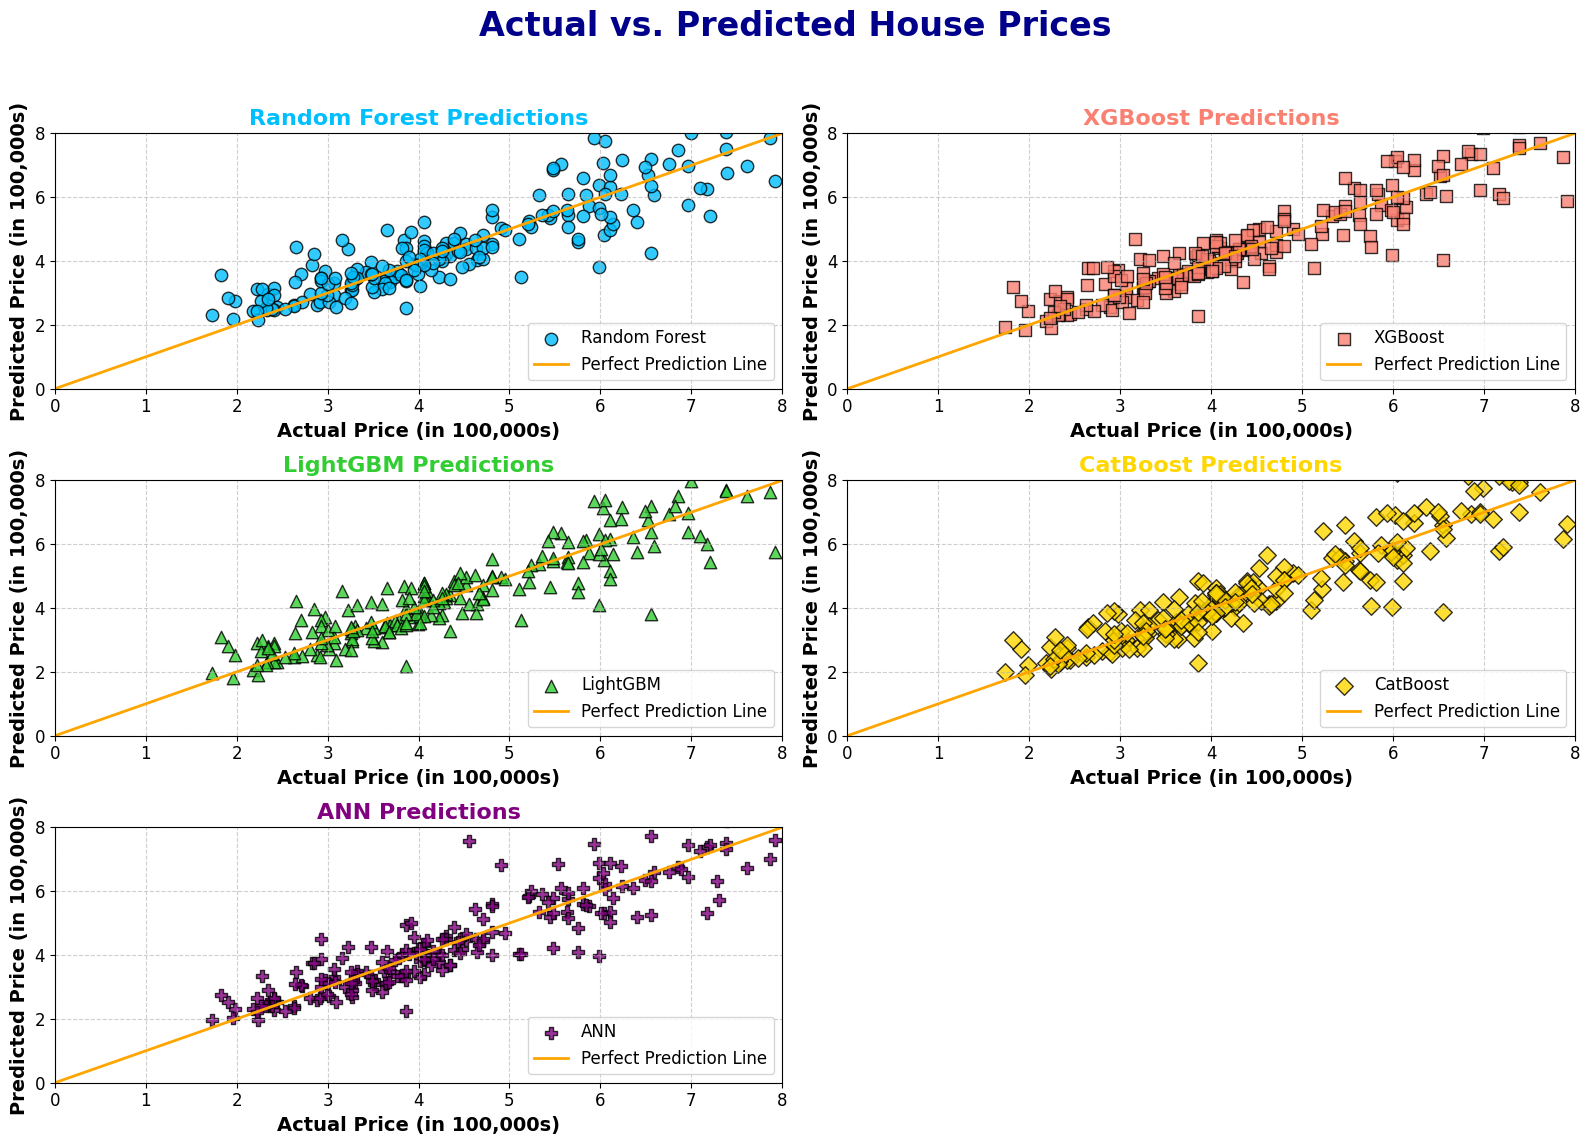

In [172]:
model_preds = {
    "Random Forest": rf_y_pred,
    "XGBoost": xgb_y_pred,
    "LightGBM": lgb_y_pred,
    "CatBoost": cat_y_pred,
    "ANN": ann_y_pred
}

colors = ['deepskyblue', 'salmon', 'limegreen', 'gold', 'purple']
markers = ['o', 's', '^', 'D', 'P']

fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle("Actual vs. Predicted House Prices", fontsize=24, fontweight='bold', color='darkblue')

axs = axs.flatten()

for i, (model, preds) in enumerate(model_preds.items()):
    ax = axs[i]

    ax.scatter(np.exp(y_test / 100000), np.exp(preds / 100000),
               color=colors[i], marker=markers[i], edgecolors="black", alpha=0.8, s=80, label=model)

    ax.plot([0, 8], [0, 8], "orange", lw=2, label="Perfect Prediction Line")

    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)

    ax.set_xlabel("Actual Price (in 100,000s)", fontsize=14, fontweight='bold')
    ax.set_ylabel("Predicted Price (in 100,000s)", fontsize=14, fontweight='bold')
    ax.set_title(f"{model} Predictions", fontsize=16, fontweight='bold', color=colors[i])
    ax.legend(loc='lower right', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='both', which='major', labelsize=12)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

oof_rf = np.zeros(len(X_train_np))
oof_xgb = np.zeros(len(X_train_np))
oof_lgb = np.zeros(len(X_train_np))
oof_cat = np.zeros(len(X_train_np))
oof_ann = np.zeros(len(X_train_np))

X_meta_train = np.zeros((len(X_train_np), 5))
X_meta_test = np.zeros((len(X_test), 5))

for train_idx, val_idx in kf.split(X_train_np):
    X_fold_train, X_fold_val = X_train_np[train_idx], X_train_np[val_idx]
    y_fold_train, y_fold_val = y_train_np[train_idx], y_train_np[val_idx]

    # Random Forest
    rf.fit(X_fold_train, y_fold_train)
    oof_rf[val_idx] = rf.predict(X_fold_val)
    X_meta_test[:, 0] += rf.predict(X_test) / kf.n_splits

    # XGBoost
    xgb.fit(X_fold_train, y_fold_train)
    oof_xgb[val_idx] = xgb.predict(X_fold_val)
    X_meta_test[:, 1] += xgb.predict(X_test) / kf.n_splits

    # LightGBM
    lgb.fit(X_fold_train, y_fold_train)
    oof_lgb[val_idx] = lgb.predict(X_fold_val)
    X_meta_test[:, 2] += lgb.predict(X_test) / kf.n_splits

    # CatBoost
    cat.fit(X_fold_train, y_fold_train)
    oof_cat[val_idx] = cat.predict(X_fold_val)
    X_meta_test[:, 3] += cat.predict(X_test) / kf.n_splits

    # ANN
    ann_model = create_best_ann_model(X_fold_train.shape[1])
    ann_model.fit(X_fold_train, y_fold_train, epochs=epochs, batch_size=batch_size, verbose=0)
    oof_ann[val_idx] = ann_model.predict(X_fold_val).reshape(-1)
    X_meta_test[:, 4] += ann_model.predict(X_test).reshape(-1) / kf.n_splits


X_meta_train[:, 0] = oof_rf
X_meta_train[:, 1] = oof_xgb
X_meta_train[:, 2] = oof_lgb
X_meta_train[:, 3] = oof_cat
X_meta_train[:, 4] = oof_ann

In [178]:
meta_model = LinearRegression()
meta_model.fit(X_meta_train, y_train)

final_predictions = meta_model.predict(X_meta_test)

mse = mean_squared_error(y_test, final_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predictions)

final_predictions = np.clip(final_predictions, 0, None)
y_test_clipped = np.clip(y_test, 0, None)
rmsle = np.sqrt(mean_squared_log_error(y_test_clipped, final_predictions))

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

Mean Squared Error (MSE): 416649270.24576545
Root Mean Squared Error (RMSE): 20411.988395199656
R-squared (R²): 0.932496386592042
Root Mean Squared Logarithmic Error (RMSLE): 0.11265825620147339


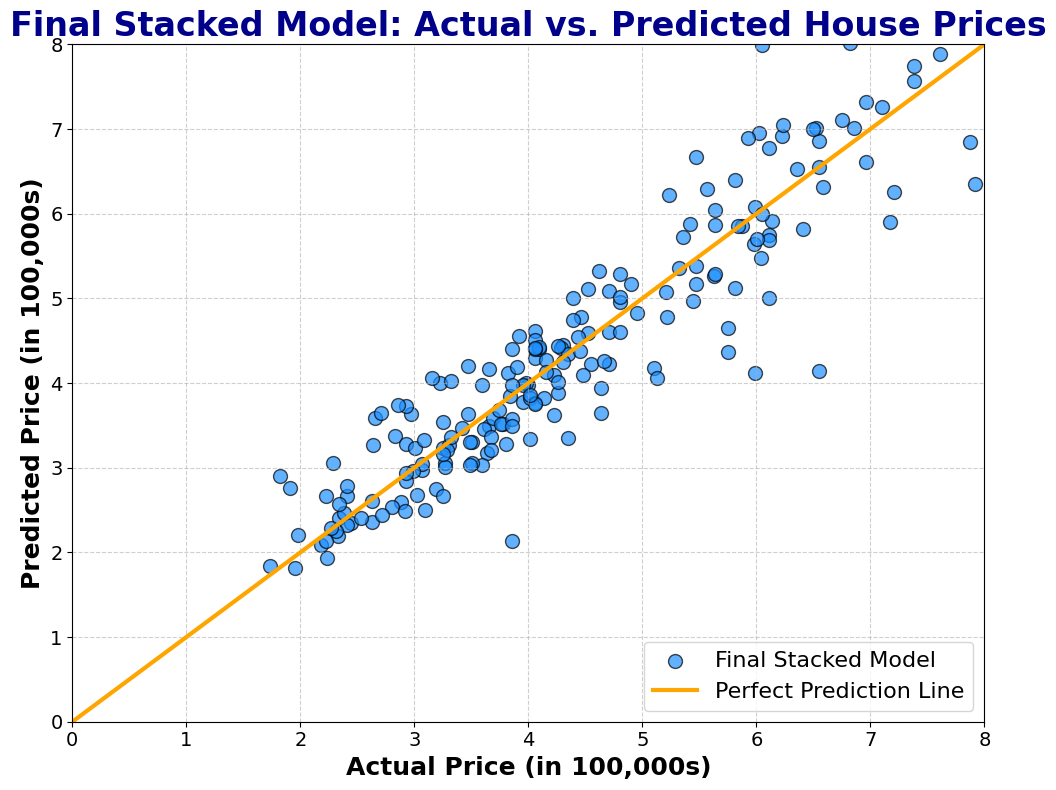

In [179]:
plt.figure(figsize=(10, 8))
plt.title("Final Stacked Model: Actual vs. Predicted House Prices", fontsize=24, fontweight='bold', color='darkblue')

plt.scatter(np.exp(y_test / 100000), np.exp(final_predictions / 100000),
            color='dodgerblue', marker='o', edgecolors="black", alpha=0.7, s=100, label="Final Stacked Model")

plt.plot([0, 8], [0, 8], "orange", lw=3, label="Perfect Prediction Line")

plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel("Actual Price (in 100,000s)", fontsize=18, fontweight='bold')
plt.ylabel("Predicted Price (in 100,000s)", fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="lower right", fontsize=16)
plt.tight_layout()
plt.show()

# Text Data Preprocessing

In [182]:
idx = test['Id']
test.drop('Id',axis=1,inplace=True)
test.drop(features_drop,axis=1,inplace=True)

In [183]:
test.isnull().sum().to_frame()

0
MSSubClass       0
MSZoning         4
LotFrontage    227
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrArea      15
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Functional       2
Fireplaces       0
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0

In [184]:
test_num = test.select_dtypes(include=["int64","float64"])
test_obj = test.drop(columns=X_num)

In [185]:
test_obj.isnull().sum().to_frame()

0
MSZoning        4
Street          0
LotShape        0
LandContour     0
Utilities       2
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
RoofStyle       0
RoofMatl        0
Exterior1st     1
Exterior2nd     1
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual       44
BsmtCond       45
BsmtExposure   44
BsmtFinType1   42
BsmtFinType2   42
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
KitchenQual     1
Functional      2
GarageType     76
GarageFinish   78
GarageQual     78
GarageCond     78
PavedDrive      0
SaleType        1
SaleCondition   0

In [186]:
Neighborhood_Lot=test.groupby("Neighborhood")["LotFrontage"].mean()
test_num["LotFrontage"]=test["LotFrontage"].fillna(X["Neighborhood"].map(Neighborhood_Lot))

test["GarageYrBlt"] = test["GarageYrBlt"].fillna(0)
test_num["GarageYrBlt"] = test["GarageYrBlt"]

Neighborhood_MasVnrArea=test.groupby("Neighborhood")["MasVnrArea"].mean()
test["MasVnrArea"]=test["MasVnrArea"].fillna(test["Neighborhood"].map(Neighborhood_MasVnrArea))
test_num["MasVnrArea"] = test["MasVnrArea"]

test_num = test_num.fillna(test_num.mean())

In [187]:
test_num.mean()

MSSubClass         57.378341
LotFrontage        68.774254
LotArea          9819.161069
OverallQual         6.078821
OverallCond         5.553804
YearBuilt        1971.357779
YearRemodAdd     1983.662783
MasVnrArea        100.906950
BsmtFinSF1        439.203704
BsmtFinSF2         52.619342
BsmtUnfSF         554.294925
TotalBsmtSF      1046.117970
1stFlrSF         1156.534613
2ndFlrSF          325.967786
LowQualFinSF        3.543523
GrLivArea        1486.045922
BsmtFullBath        0.434454
BsmtHalfBath        0.065202
FullBath            1.570939
HalfBath            0.377656
BedroomAbvGr        2.854010
KitchenAbvGr        1.042495
TotRmsAbvGrd        6.385195
Fireplaces          0.581220
GarageYrBlt      1871.989719
GarageCars          1.766118
GarageArea        472.768861
WoodDeckSF         93.174777
OpenPorchSF        48.313914
EnclosedPorch      24.243317
3SsnPorch           1.794380
ScreenPorch        17.064428
PoolArea            1.744345
MiscVal            58.167923
MoSold              6.104181
YrSold           2007.769705
dtype: float64

In [188]:
test["BsmtQual"].isnull().sum()

44

In [189]:
test.loc[test["OverallQual"]>=8,"BsmtCond"]=test.loc[test["OverallQual"]>=8,"BsmtQual"].fillna("Ex")
test.loc[test["OverallQual"]>=6,"BsmtCond"]=test.loc[test["OverallQual"]>=6,"BsmtQual"].fillna("Gd")
test.loc[test["OverallQual"]>=5,"BsmtCond"]=test.loc[test["OverallQual"]>=5,"BsmtQual"].fillna("TA")
test.loc[test["OverallQual"]>=4,"BsmtCond"]=test.loc[test["OverallQual"]>=4,"BsmtQual"].fillna("Fa")
test.loc[test["OverallQual"]<4,"BsmtCond"]=test.loc[test["OverallQual"]<4,"BsmtQual"].fillna("Po")
test_obj["BsmtCond"] = test['BsmtCond']

test.loc[test["OverallQual"]>=8,"BsmtQual"]=test.loc[test["OverallQual"]>=8,"BsmtQual"].fillna("Ex")
test.loc[(test["OverallQual"] >= 6) & (test["OverallQual"] < 8), "BsmtQual"] = test.loc[(test["OverallQual"] >= 6) & (test["OverallQual"] < 8), "BsmtQual"].fillna("Gd")
test.loc[(test["OverallQual"] >= 4) & (test["OverallQual"] < 6), "BsmtQual"] = test.loc[(test["OverallQual"] >= 4) & (test["OverallQual"] < 6), "BsmtQual"].fillna("Fa")
test.loc[test["OverallQual"]<4,"BsmtQual"]=test.loc[test["OverallQual"]<4,"BsmtQual"].fillna("Fa")
test_obj["BsmtQual"] =  test["BsmtQual"]

test["BsmtExposure"]=test["BsmtExposure"].fillna("No")
test_obj['BsmtExposure'] = test['BsmtExposure']

cond_fintype1=test.groupby("OverallCond")["BsmtFinType1"].transform(lambda x: x.mode().iloc[0])
test["BsmtFinType1"]=test["BsmtFinType1"].fillna(cond_fintype1)
test_obj["BsmtFinType1"] = test["BsmtFinType1"]
cond_fintype2=test.groupby("OverallCond")["BsmtFinType2"].transform(lambda x:x.mode().iloc[0])
test["BsmtFinType2"]=test["BsmtFinType2"].fillna(cond_fintype2)
test_obj["BsmtFinType2"] = test["BsmtFinType2"]

test["Electrical"]=test["Electrical"].fillna("SBrkr")
test_obj["Electrical"] = test["Electrical"]

test["GarageType"]= test["GarageType"].fillna("NG")
test_obj["GarageType"] = test["GarageType"]
test["GarageFinish"]= test["GarageFinish"].fillna("NG")
test_obj["GarageFinish"] = test["GarageFinish"]
test["GarageQual"]= test["GarageQual"].fillna("NG")
test_obj["GarageQual"] = test["GarageQual"]
test["GarageCond"]= test["GarageCond"].fillna("NG")
test_obj["GarageCond"] = test["GarageCond"]

In [190]:
test_num.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [192]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
column_names = test_obj.columns.tolist()
imputer.fit(test_obj[column_names])
test_obj_imputed = imputer.transform(test_obj[column_names])
test_obj_imputed = pd.DataFrame(test_obj_imputed, columns=column_names)

In [193]:
ordered_cols = ["Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "SaleType", "SaleCondition"]
non_ordered_cols = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Heating", "CentralAir", "Electrical", "Functional", "PavedDrive"]
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False)
for col in ordered_cols:
    test_obj_imputed[col] = label_encoder.fit_transform(test_obj_imputed[col])
one_hot_cols = one_hot_encoder.fit_transform(test_obj_imputed[non_ordered_cols])
test_obj_complete = pd.concat([test_obj_imputed.drop(non_ordered_cols, axis=1), pd.DataFrame(one_hot_cols, columns=one_hot_encoder.get_feature_names_out(non_ordered_cols))], axis=1)

In [194]:
continuous_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','ScreenPorch']

test_num_scaled = pd.DataFrame(scaler.fit_transform(test_num[continuous_cols]), columns=continuous_cols)
test_num_scaled = pd.concat([test_num_scaled, test_num.drop(continuous_cols, axis=1)], axis=1)

In [203]:
test_complete = pd.concat([test_num_scaled, test_obj_complete], axis=1)

In [204]:
missing_cols = set(X_complete_no_outliers) - set(test_complete)
print(list(missing_cols))

['Heating_OthW', 'Utilities_NoSeWa', 'Heating_Floor', 'Electrical_Mix']


In [205]:
missing_cols = ['Utilities_NoSeWa', 'Electrical_Mix', 'Heating_OthW', 'Heating_Floor']
X_complete_no_outliers[missing_cols].value_counts()

Utilities_NoSeWa  Electrical_Mix  Heating_OthW  Heating_Floor
0.0               0.0             0.0           0.0              1351
                                  1.0           0.0                 2
                                  0.0           1.0                 1
                  1.0             0.0           0.0                 1
1.0               0.0             0.0           0.0                 1
Name: count, dtype: int64

In [206]:
test_complete[missing_cols] = 0.0

In [207]:
col_order = X_complete_no_outliers.columns

In [208]:
test_complete = test_complete.reindex(columns=col_order)

In [210]:
test_complete.head(50)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0           20     0.529498  0.363929            5            6       1961   
1           20     0.576666  0.897861            6            6       1958   
2           60     0.246489  0.809646            5            5       1997   
3           60     0.435162  0.032064            6            6       1998   
4          120    -1.215725 -0.971808            8            5       1992   
5           60     0.293657  0.036505            6            5       1993   
6           20    -0.204417 -0.371261            6            7       1992   
7           60    -0.272361 -0.286074            6            5       1998   
8           20     0.765339  0.072033            7            5       1990   
9           20     0.057816 -0.286478            4            5       1970   
10         120    -2.017585 -0.799618            7            5       1999   
11         160    -2.253426 -1.643007            6            5       1971   
12         160    -2.253426 -1.643007            5            5       1971   
13         160    -2.111921 -1.521889            6            6       1975   
14         120    -2.111921 -1.521889            7            6       1975   
15          60     1.567199  0.613434            9            5       2009   
16          20     1.189853  0.618480            8            5       2009   
17          20     1.001180  0.343339            9            5       2005   
18          20     0.482330  0.868590            8            5       2005   
19          20     1.944544  0.904522            9            5       2003   
20          60     1.708703  0.773310            8            5       2002   
21         120    -1.310062 -0.542442            8            5       2006   
22          20     1.472862  1.751142            6            5       2005   
23         120    -1.215725 -1.335568            7            5       2006   
24          80    -0.083688  0.702658            7            5       2004   
25          60    -0.272361 -0.250748            7            5       2004   
26          60    -0.413866  1.536964            8            5       1998   
27          20     0.199321 -0.167984            8            5       2005   
28          20     1.095517 -0.121959            7            5       2009   
29          20     0.718171  0.125325            6            5       2005   
30          60     0.057816  0.424085            7            5       2004   
31          30     0.057816 -0.003868            5            5       1920   
32          20    -1.404398  1.128592            6            6       1974   
33          60     0.765339  0.670965            8            5       1993   
34          60     0.906844  0.265419            8            5       1992   
35         120    -2.064753 -1.006125            7            5       2004   
36         160    -1.404398 -1.272586            7            5       2004   
37         160    -1.828912 -1.333145            7            5       2004   
38         160    -2.111921 -1.468597            7            5       2004   
39         160    -2.111921 -1.468597            6            5       2005   
40         160     0.245491 -1.380584            6            5       2000   
41         160     0.637810 -1.497059            7            5       2003   
42          20    -0.555370  0.612424            8            5       2010   
43          60    -0.036520 -0.492582            8            5       2000   
44          20     0.529498 -0.367224            7            5       2002   
45          20     0.821724  0.128555            6            6       1967   
46          60     0.529498  0.196180            6            5       1993   
47          50    -0.204417  1.820381            6            5       1978   
48          60     0.529498 -0.044241            6            6       1971   
49          20     0.529498 -0.044241            5            5       1966   

    YearRemodAdd  MasVnrA

In [212]:
rf_deploy_preds = rf.predict(test_complete)
xgb_deploy_preds = xgb.predict(test_complete)
lgb_deploy_preds = lgb.predict(test_complete)
cat_deploy_preds = cat.predict(test_complete)
ann_deploy_preds = ann_model.predict(test_complete).reshape(-1)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [213]:
X_meta_deploy = np.column_stack((
    rf_deploy_preds,
    xgb_deploy_preds,
    lgb_deploy_preds,
    cat_deploy_preds,
    ann_deploy_preds
))

In [214]:
final_deploy_predictions = meta_model.predict(X_meta_deploy)

In [217]:
output = pd.DataFrame({'Id': idx, 'SalePrice': final_deploy_predictions})
output.to_csv('submission.csv', index=False)